# The easiest hardest regression problem

Once upon a meetup, I heard a reference to some work/article that was done, even while the presenter had mentioned it as an anecdote, it had this purpose: 

Neural Networks are indeed a very strong tool, but it may take a bigger neural network than you might think to approximate even the simplest non-linear equation!

They also said what the results of the article were, and what they had done in their work they presented to help with what the article had shown.

So recently, I have decided that I want to recreate the work they have mentioned as an anecdote, and this is my try.

## The Premise

We want to explore the question: what is the easiest non-trivial regression problem?

Since all regression problems can be viewed as hidden function problems, we can refine our question to ask: what is the simplest yet non-trivial function that a neural network can be tasked with approximating?

At their core, neural networks can be regarded as ensembles of linear regressions, meaning that any function that is linear or even piecewise linear could be considered trivial.

So, what is the simplest non-linear function?

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import os
os.environ["KERAS_BACKEND"] = "torch"
# %env KERAS_BACKEND=torch
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

# import keras
# import keras.models
# import keras.layers

import matplotlib.pyplot as plt
import seaborn as sns


c:\Users\User\anaconda3\envs\lior1\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


## One input

### Define the Hidden Function

For a single-input function, we can argue that the simplest non-linear function would be:

$$ y = x^2 $$

This quadratic function represents a basic form of non-linearity, making it a fundamental example for analysis.
It is non-linear at any point, but still easy to understand and has the minimal possible terms.


In [2]:

# Define the hidden function
def hidden_function(x):
    """Hidden function: y = x^2"""
    return x**2


### Make the inputs and outputs
including splitting to train, validation and test,
and making tests data for out of range test.

In [3]:

# --- Define parameters (assuming these might be in a previous cell) ---
a1 = -10  # Lower bound for input x
b1 = 10   # Upper bound for input x
a2 = -25 # Lower bound for mid range test for input x
b2 = 25 # Upper bound for mid range test for input x
a3 = -100 # Lower bound for long range test for input x
b3 = 100 # Upper bound for long range test for input x
# ---------------------------------------------------------------------
num_points = 10000 # Number of data points to generate
train_ratio = 0.6
test_ratio = 0.2
validation_ratio = 0.2 # Note: train_ratio + test_ratio + validation_ratio should be 1.0
# ---------------------------------------------------------------------
test_on:str = "mid_range"  # Options: "short_range", "mid_range", "long_range"

# Ensure parameters are defined, provide defaults if not
try:
        a1, a2, a3
except NameError:
        a1 = -10
        a2 = -25
        a3 = -100
try:
        b1, b2, b3
except NameError:
        b1 = 10
        b2 = 25
        b3 = 100
try:
        num_points
except NameError:
        num_points = 1000
try:
        train_ratio
except NameError:
        train_ratio = 0.6
try:
        test_ratio
except NameError:
        test_ratio = 0.2
try:
        validation_ratio
except NameError:
        validation_ratio = 0.2
try:
        test_on
except NameError:
        test_on = "short_range"

# Generate random input points between a1 and b1
# Using uniform distribution for floats. Duplicates are highly improbable.
# X_test_short_range and Y_test_short_range are for short-range testing
X_test_short_range_1_input = np.random.uniform(a1, b1, num_points)
# Calculate the corresponding y values using the hidden function
Y_test_short_range_1_input = hidden_function(X_test_short_range_1_input)
# X_test_mid_range and Y_test_mid_range are for mid-range testing
X_test_mid_range_1_input = np.concatenate((np.random.uniform(a2, a1, num_points//2), np.random.uniform(b1, b2, num_points//2)))
Y_test_mid_range_1_input = hidden_function(X_test_mid_range_1_input)
# X_test_long_range and Y_test_long_range are for long-range testing
X_test_long_range_1_input = np.concatenate((np.random.uniform(a3, a2, num_points//2), np.random.uniform(b2, b3, num_points//2)))
Y_test_long_range_1_input = hidden_function(X_test_long_range_1_input)


if test_on == "short_range":
    # Use short range test data
    x_values_1_input = X_test_short_range_1_input
    y_values_1_input = Y_test_short_range_1_input
elif test_on == "mid_range":
    # Use mid range test data
    x_values_1_input = X_test_mid_range_1_input
    y_values_1_input = Y_test_mid_range_1_input
elif test_on == "long_range":
    # Use long range test data
    x_values_1_input = X_test_long_range_1_input
    y_values_1_input = Y_test_long_range_1_input

# Split the data into training, testing, and validation sets
# First, split into training and the rest (test + validation)
X_train_1_input, X_temp_1_input, y_train_1_input, y_temp_1_input = train_test_split(
        x_values_1_input, y_values_1_input, test_size=(test_ratio + validation_ratio), # random_state=42
)

# Second, split the rest (temp) into testing and validation
# The test_size here is the ratio of validation set size to the size of the temp set
test_val_ratio_in_temp = validation_ratio / (test_ratio + validation_ratio)
X_test_1_input, X_val_1_input, y_test_1_input, y_val_1_input = train_test_split(
        X_temp_1_input, y_temp_1_input, test_size=test_val_ratio_in_temp, # random_state=42
)

# The data is now split into:
# X_train_1_input, y_train_1_input
# X_test_1_input, y_test_1_input
# X_val_1_input, y_val_1_input

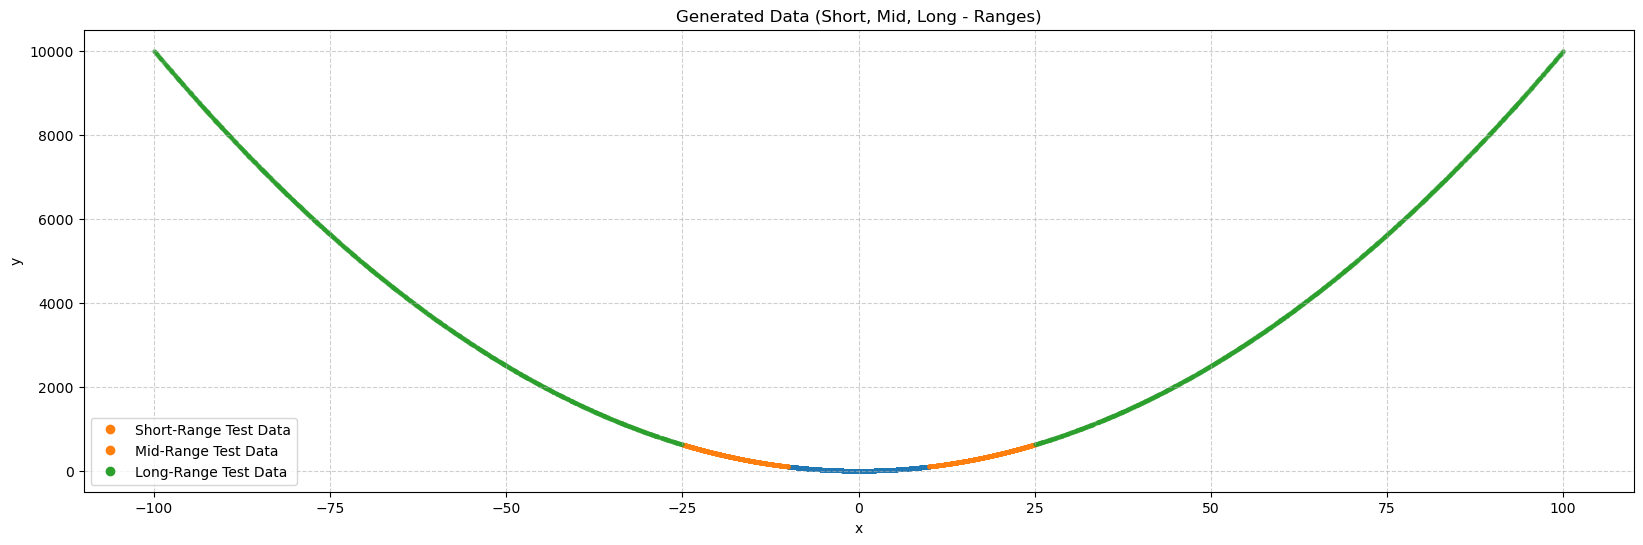

In [4]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(20, 6))

# Plot the data points with low alpha
# scatter_train = ax.scatter(X_train_1_input, y_train_1_input, alpha=0.1, s=5)
# scatter_test = ax.scatter(X_test_1_input, y_test_1_input, alpha=0.1, s=5)
# scatter_val = ax.scatter(X_val_1_input, y_val_1_input, alpha=0.1, s=5)
scatter_short = ax.scatter(X_test_short_range_1_input, Y_test_short_range_1_input, alpha=0.1, s=5)
scatter_mid = ax.scatter(X_test_mid_range_1_input, Y_test_mid_range_1_input, alpha=0.1, s=5)
scatter_long = ax.scatter(X_test_long_range_1_input, Y_test_long_range_1_input, alpha=0.1, s=5)

# Create dummy plot elements with solid color for the legend
handles = []
labels = []

# Get colors from the scatter plots
# color_train = scatter_train.get_facecolor()[0]
# color_test = scatter_test.get_facecolor()[0]
# color_val = scatter_val.get_facecolor()[0]
color_short = scatter_mid.get_facecolor()[0]
color_mid = scatter_mid.get_facecolor()[0]
color_long = scatter_long.get_facecolor()[0]

# Create dummy handles with alpha=1.0
# dummy_train, = ax.plot([], [], 'o', color=color_train, alpha=1.0, label='Training Data')
# dummy_test, = ax.plot([], [], 'o', color=color_test, alpha=1.0, label='Testing Data')
# dummy_val, = ax.plot([], [], 'o', color=color_val, alpha=1.0, label='Validation Data')
dummy_short, = ax.plot([], [], 'o', color=color_short, alpha=1.0, label='Short-Range Test Data')
dummy_mid, = ax.plot([], [], 'o', color=color_mid, alpha=1.0, label='Mid-Range Test Data')
dummy_long, = ax.plot([], [], 'o', color=color_long, alpha=1.0, label='Long-Range Test Data')

# Add dummy handles and labels to the lists
# handles.extend([dummy_train, dummy_test, dummy_val, dummy_short, dummy_mid, dummy_long])
# labels.extend(['Training Data', 'Testing Data', 'Validation Data', 'Short-Range Test Data', 'Mid-Range Test Data', 'Long-Range Test Data'])
handles.extend([dummy_short, dummy_mid, dummy_long])
labels.extend(['Short-Range Test Data', 'Mid-Range Test Data', 'Long-Range Test Data'])


# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_title('Generated Data Split (Train, Test, Validation)')
ax.set_title('Generated Data (Short, Mid, Long - Ranges)')

# Add a legend using the dummy handles
ax.legend(handles=handles, labels=labels)

# Add a grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

### Making a function to create the networks

In [5]:

def create_mlp_model(hidden_layer_sizes: list[int], input_size:int = 1, l2_reg: float = 0.0) -> Sequential:
    """
    Creates a Keras Sequential MLP model with {input_size}(default 1) input, 1 output,
    and hidden layers of specified sizes using the PyTorch backend.

    Args:
        hidden_layer_sizes: A list of integers representing the
          number of neurons in each hidden layer.
        l2_reg: L2 regularization factor (default: 0.0, no regularization)

    Returns:
        A compiled Keras Sequential model.
    """

    model = Sequential()

    model.add(Input(shape=(input_size,), name="input_layer"))  # Input layer

    # Input layer connected to the first hidden layer
    if not hidden_layer_sizes:
        # Handle case with no hidden layers - direct input to output
        # Note: Keras 3 requires input_shape even for the first layer
        print("No hidden layers specified. Using a single output layer.")
        # model.add(Dense(input_size, input_shape=(input_size,)))  # Linear activation is default for Dense, suitable for regression
    else:
        # Add the first hidden layer (connected to input)
        model.add(Dense(hidden_layer_sizes[0], activation="relu", name="hidden_layer_1", kernel_regularizer=l2(l2_reg)))

        # Add subsequent hidden layers
        for i,size in enumerate(hidden_layer_sizes[1:], start=2):
            model.add(Dense(size, activation="relu", name=f"hidden_layer_{i}", kernel_regularizer=l2(l2_reg)))

    # Output layer
    # If there were hidden layers, add the final output layer
    if hidden_layer_sizes:
         model.add(Dense(1, name="output_layer", kernel_regularizer=l2(l2_reg))) # Linear activation is default for Dense, suitable for regression


    # Compile the model
    model.name = f"mlp_model with_{len(hidden_layer_sizes)}_hidden_layers of sizes {hidden_layer_sizes}"
    model.compile(optimizer="adam", loss="mse")

    model.summary()

    return model


### Making a function to test the created networks

Model: "mlp_model with_2_hidden_layers of sizes [10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 126406.2734 - val_loss: 124625.9219
Epoch 2/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 118716.8594 - val_loss: 96945.5859
Epoch 3/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 84185.5547 - val_loss: 49848.3594
Epoch 4/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 37062.7656 - val_loss: 14804.1543
Epoch 5/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11327.8984 - val_loss: 6304.0151
Epoch 6/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5934.9370 - val_loss: 5678.2036
Epoch 7/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5652.9590 - val_loss: 5633.3745
Epoch 8/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5492.0303 - val_loss: 5598.7622
Epoch 9/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5575.1953 - val_loss: 5567.9287
Epoch 10/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5562.5791 - val_loss: 5528.2842
Epoch 11/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - l

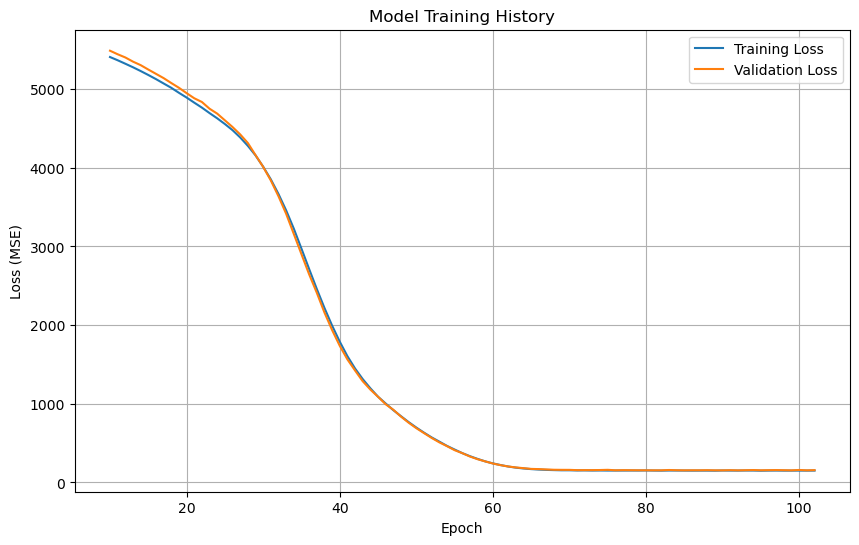

In [6]:

def test_mlp_model(model_hidden_layers: list[int],
                  X_train: np.ndarray,
                  y_train: np.ndarray,
                  X_val: np.ndarray,
                  y_val: np.ndarray,
                  X_test: np.ndarray,
                  y_test: np.ndarray,
                  X_test_short_range: np.ndarray,
                  Y_test_short_range: np.ndarray,
                  X_test_mid_range: np.ndarray,
                  Y_test_mid_range: np.ndarray,
                  X_test_long_range: np.ndarray,
                  Y_test_long_range: np.ndarray,
                  epochs: int = 50,
                  batch_size: int = 32,
                  verbose: int = 1,
                  l2_reg: float = 0.0,
                  patience: int = 10,
                  plot_history: bool = True,
                  ) -> tuple[Sequential, dict, pd.Series]:
    """
    Test function to create and return a simple MLP model.
    This is a placeholder for actual model testing.
    """

    if len(X_train.shape) == 1:
        input_size = 1
    else:
        input_size = X_train.shape[1]

    # Create the model using the function defined previously
    small_model = create_mlp_model(model_hidden_layers, input_size=input_size, l2_reg=l2_reg)

    # Define the EarlyStopping callback
    # Monitor validation loss and stop if it doesn't improve for 'patience' epochs
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)


    # Train the model
    # Use validation data to monitor performance during training
    history = small_model.fit(
        X_train,
        y_train,
        epochs=epochs, # You can adjust the number of epochs
        batch_size=batch_size, # You can adjust the batch size
        validation_data=(X_val, y_val),
        callbacks=[early_stopping], # Add the EarlyStopping callback here
        verbose=verbose # Set to 1 or 2 for more detailed output during training
    )

    # Evaluate the model on the test set
    test_loss = small_model.evaluate(X_test, y_test, verbose=verbose)
    # Evaluate the model on the short, mid, and long range test sets
    test_loss_short_range = small_model.evaluate(X_test_short_range, Y_test_short_range, verbose=verbose)
    test_loss_mid_range = small_model.evaluate(X_test_mid_range, Y_test_mid_range, verbose=verbose)
    test_loss_long_range = small_model.evaluate(X_test_long_range, Y_test_long_range, verbose=verbose)

    losses = pd.Series()
    losses['on range'] = test_loss
    losses['short range'] = test_loss_short_range
    losses['mid range'] = test_loss_mid_range
    losses['long range'] = test_loss_long_range

    print(f"Test Loss (MSE): {test_loss}")
    print(f"Test Loss Short-Range (MSE): {test_loss_short_range}")
    print(f"Test Loss Mid-Range (MSE): {test_loss_mid_range}")
    print(f"Test Loss Long-Range (MSE): {test_loss_long_range}")

    # Optional: Plot training history
    if plot_history:
        plt.figure(figsize=(10, 6))
        start_point = len(history.history['loss'])//10  # Start plotting after 10% of epochs
        end_point = len(history.history['loss'])  # End at the last epoch
        plt.plot(range(start_point,len(history.history['loss'])),history.history['loss'][start_point:], label='Training Loss')
        plt.plot(range(start_point,end_point),history.history['val_loss'][start_point:], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE)')
        plt.title('Model Training History')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Return the trained model and training history for further analysis if needed
    return small_model, history, losses

small_model_hidden_layers = [10,10]  # Example: two hidden layers with 10 neurons each
# Test the MLP model with the specified hidden layers
small_model, history, losses = test_mlp_model(small_model_hidden_layers,
                                              X_train_1_input, y_train_1_input,
                                              X_val_1_input, y_val_1_input,
                                              X_test_1_input, y_test_1_input,
                                              X_test_short_range_1_input, Y_test_short_range_1_input,
                                              X_test_mid_range_1_input, Y_test_mid_range_1_input,
                                              X_test_long_range_1_input, Y_test_long_range_1_input,
                                              epochs=500, batch_size=32, verbose=1, plot_history=True)


### Test over a wide range of networks depths and sizes

Testing 1 layers with 10 neurons per layer...


Model: "mlp_model with_1_hidden_layers of sizes [10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 124028.2109 - val_loss: 118250.0781
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 112582.2656 - val_loss: 102449.6641
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 94285.9141 - val_loss: 81880.3203
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 75157.5469 - val_loss: 60816.2891
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 55111.2344 - val_loss: 42788.2773
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 38001.5898 - val_loss: 29400.7754
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 25817.2773 - val_loss: 20141.7188
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 17213.4473 - val_loss: 14003.4805
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 12072.3691 - val_loss: 10093.0654
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9052.4678 - val_loss: 7756.3379
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5m

Model: "mlp_model with_1_hidden_layers of sizes [25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76 (304.00 B)

 Trainable params: 76 (304.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 129424.2109 - val_loss: 119268.0625
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 112679.0703 - val_loss: 97507.0078
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 87543.3047 - val_loss: 69159.6250
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 62054.2461 - val_loss: 42861.2734
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 36663.2383 - val_loss: 24537.0215
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 21381.4238 - val_loss: 13866.7725
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 12247.0762 - val_loss: 8551.8799
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7499.0566 - val_loss: 6449.3496
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6037.5127 - val_loss: 5813.0078
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5651.8159 - val_loss: 5639.5020
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Model: "mlp_model with_1_hidden_layers of sizes [50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 122891.8516 - val_loss: 106586.9531
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 94806.4688 - val_loss: 66435.7891
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 55808.5234 - val_loss: 31893.1035
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 26568.5156 - val_loss: 14533.8389
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 12165.8545 - val_loss: 7879.7295
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7114.0620 - val_loss: 5998.6641
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5547.1807 - val_loss: 5643.5649
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5455.6245 - val_loss: 5573.9629
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5500.0386 - val_loss: 5538.7705
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5478.1978 - val_loss: 5503.0679
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - lo

Model: "mlp_model with_1_hidden_layers of sizes [75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226 (904.00 B)

 Trainable params: 226 (904.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 123697.7734 - val_loss: 99241.9062
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 84560.4844 - val_loss: 47029.9023
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 35763.1602 - val_loss: 13069.2744
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10063.8145 - val_loss: 6070.2847
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5825.2305 - val_loss: 5625.5317
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5586.4287 - val_loss: 5576.2515
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5419.0122 - val_loss: 5536.2949
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5475.8281 - val_loss: 5485.8208
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5346.6572 - val_loss: 5433.2715
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5376.1606 - val_loss: 5378.7646
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss:

Model: "mlp_model with_1_hidden_layers of sizes [100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 123658.5703 - val_loss: 95819.9375
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 81759.4141 - val_loss: 40081.3398
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 28989.5391 - val_loss: 10342.7109
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8581.6875 - val_loss: 5861.1079
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5534.0918 - val_loss: 5586.5571
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5478.8804 - val_loss: 5543.8896
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5353.5967 - val_loss: 5495.8677
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5337.2515 - val_loss: 5447.1128
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5363.3184 - val_loss: 5393.3008
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5304.0854 - val_loss: 5333.6128
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 

Model: "mlp_model with_2_hidden_layers of sizes [10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 124164.4922 - val_loss: 116333.7969
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 107647.9141 - val_loss: 80469.0625
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 64937.7266 - val_loss: 31511.6914
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 22363.0703 - val_loss: 8305.9717
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6825.0439 - val_loss: 5691.9521
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5504.6484 - val_loss: 5576.0356
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5446.9238 - val_loss: 5543.9238
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5462.5015 - val_loss: 5512.1523
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5273.7485 - val_loss: 5475.2993
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5393.7510 - val_loss: 5427.4282
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - los

Model: "mlp_model with_2_hidden_layers of sizes [25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 726 (2.84 KB)

 Trainable params: 726 (2.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 128104.3828 - val_loss: 86244.7031
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 56876.7188 - val_loss: 7334.3325
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6165.4424 - val_loss: 5542.9121
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5457.4912 - val_loss: 5475.2642
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5381.0259 - val_loss: 5395.1646
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5302.5830 - val_loss: 5315.1299
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5140.0327 - val_loss: 5213.6616
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5063.4146 - val_loss: 5124.0928
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5008.0859 - val_loss: 5031.4380
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4888.8364 - val_loss: 4891.2783
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 478

Model: "mlp_model with_2_hidden_layers of sizes [50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,701 (10.55 KB)

 Trainable params: 2,701 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 112585.3984 - val_loss: 13746.8223
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7694.9038 - val_loss: 5466.6240
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5299.5396 - val_loss: 5347.8501
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5200.4243 - val_loss: 5233.3120
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4982.7905 - val_loss: 5109.4473
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5038.7412 - val_loss: 4959.2642
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4916.7505 - val_loss: 4807.1953
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4637.5176 - val_loss: 4616.5464
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4523.8506 - val_loss: 4440.0762
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4334.1802 - val_loss: 4243.1841
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4104

Model: "mlp_model with_2_hidden_layers of sizes [75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,926 (23.15 KB)

 Trainable params: 5,926 (23.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 100487.7656 - val_loss: 5695.7695
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5392.5835 - val_loss: 5380.1758
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5229.7817 - val_loss: 5239.8071
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5147.6040 - val_loss: 5068.3208
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4905.9263 - val_loss: 4898.0562
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4806.6499 - val_loss: 4673.0498
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4495.7720 - val_loss: 4451.7266
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4362.5796 - val_loss: 4263.3130
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4076.7727 - val_loss: 3919.9661
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3733.2571 - val_loss: 3629.4607
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3490.

Model: "mlp_model with_2_hidden_layers of sizes [100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,401 (40.63 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 89185.1250 - val_loss: 5458.0127
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5358.6270 - val_loss: 5283.8716
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5162.2202 - val_loss: 5078.1484
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4964.3516 - val_loss: 4846.4019
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4730.7642 - val_loss: 4556.5415
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4424.7695 - val_loss: 4272.6245
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4092.0608 - val_loss: 3895.5203
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3768.3225 - val_loss: 3488.3596
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3290.7280 - val_loss: 3015.9302
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2814.0076 - val_loss: 2454.3770
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 226

Model: "mlp_model with_3_hidden_layers of sizes [10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251 (1004.00 B)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 122649.6328 - val_loss: 71477.6328
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 39104.8359 - val_loss: 5631.6919
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5335.1782 - val_loss: 5527.3423
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5352.6885 - val_loss: 5435.7476
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5340.3936 - val_loss: 5339.3491
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5209.7705 - val_loss: 5221.3740
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5111.3271 - val_loss: 5108.5347
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4938.8291 - val_loss: 4974.5596
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4868.0830 - val_loss: 4825.2729
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4836.9595 - val_loss: 4684.9941
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 451

Model: "mlp_model with_3_hidden_layers of sizes [25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,376 (5.38 KB)

 Trainable params: 1,376 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 109507.4375 - val_loss: 5581.6045
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5457.0850 - val_loss: 5405.6743
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5172.6074 - val_loss: 5277.2783
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5032.4761 - val_loss: 4979.9409
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4879.2437 - val_loss: 4761.4785
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4597.4937 - val_loss: 4514.0615
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4333.8262 - val_loss: 4293.7559
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4112.8784 - val_loss: 3934.6731
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3794.1858 - val_loss: 3592.5732
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3352.7693 - val_loss: 3189.6028
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3046.

Model: "mlp_model with_3_hidden_layers of sizes [50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,251 (20.51 KB)

 Trainable params: 5,251 (20.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 92031.1641 - val_loss: 5399.8994
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5330.8374 - val_loss: 5214.9834
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5105.8364 - val_loss: 4999.2656
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4776.6230 - val_loss: 4648.1606
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4573.4194 - val_loss: 4334.4678
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4152.2178 - val_loss: 3889.4653
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3671.8018 - val_loss: 3388.4814
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3153.4045 - val_loss: 2659.9885
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2380.1821 - val_loss: 1642.5602
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1353.4789 - val_loss: 664.6577
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 493.929

Model: "mlp_model with_3_hidden_layers of sizes [75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,626 (45.41 KB)

 Trainable params: 11,626 (45.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 70448.7188 - val_loss: 5258.8730
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5083.5298 - val_loss: 5010.1670
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4821.5532 - val_loss: 4536.7183
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4424.4697 - val_loss: 3946.7722
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3682.9141 - val_loss: 3118.9348
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2764.4578 - val_loss: 1844.9574
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1429.2439 - val_loss: 634.7889
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 411.5662 - val_loss: 152.6296
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 112.9687 - val_loss: 56.9830
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 47.8218 - val_loss: 27.7846
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 24.2999 - val_l

Model: "mlp_model with_3_hidden_layers of sizes [100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,501 (80.08 KB)

 Trainable params: 20,501 (80.08 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 76977.1953 - val_loss: 5302.7529
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5069.8979 - val_loss: 4948.8501
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4728.0225 - val_loss: 4488.7495
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4231.5034 - val_loss: 3813.9480
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3500.7327 - val_loss: 2834.5376
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2534.8203 - val_loss: 1541.2050
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1234.0646 - val_loss: 471.8731
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 319.1729 - val_loss: 121.8282
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 90.0241 - val_loss: 55.9243
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 37.1515 - val_loss: 34.0112
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 18.8540 - val_los

Model: "mlp_model with_4_hidden_layers of sizes [10, 10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 130386.5625 - val_loss: 98415.9297
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 61147.7305 - val_loss: 6118.6655
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5676.7886 - val_loss: 5605.4634
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5389.5928 - val_loss: 5505.0186
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5281.1045 - val_loss: 5343.8677
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5174.2231 - val_loss: 5197.8892
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4993.4517 - val_loss: 5041.0811
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4871.2793 - val_loss: 4888.6450
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4623.1973 - val_loss: 4740.2368
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4543.8081 - val_loss: 4522.6030
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 436

Model: "mlp_model with_4_hidden_layers of sizes [25, 25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,026 (7.91 KB)

 Trainable params: 2,026 (7.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 96153.4453 - val_loss: 5537.5767
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5289.6582 - val_loss: 5235.5220
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5090.4829 - val_loss: 4938.5371
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4807.4316 - val_loss: 4627.2920
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4411.7002 - val_loss: 4199.0454
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3956.4167 - val_loss: 3692.2197
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3529.3030 - val_loss: 3040.9124
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2849.4172 - val_loss: 2243.5635
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1989.9641 - val_loss: 1307.9653
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1096.6476 - val_loss: 606.7068
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 485.040

Model: "mlp_model with_4_hidden_layers of sizes [50, 50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,801 (30.47 KB)

 Trainable params: 7,801 (30.47 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 79935.5781 - val_loss: 5311.7368
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5140.9980 - val_loss: 5018.0132
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4849.8403 - val_loss: 4701.9536
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4282.5923 - val_loss: 3926.8821
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3696.6274 - val_loss: 3109.4294
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2751.2307 - val_loss: 1797.5851
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1319.0632 - val_loss: 368.2123
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 233.9558 - val_loss: 81.6619
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 60.8137 - val_loss: 32.6236
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 28.3352 - val_loss: 17.5373
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 17.0135 - val_lo

Model: "mlp_model with_4_hidden_layers of sizes [75, 75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,326 (67.68 KB)

 Trainable params: 17,326 (67.68 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 69127.4766 - val_loss: 5225.6680
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5020.4849 - val_loss: 4790.4609
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4518.4224 - val_loss: 4075.8125
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3863.7244 - val_loss: 3189.1409
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2755.8342 - val_loss: 1426.6163
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 918.9087 - val_loss: 127.7156
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 88.8580 - val_loss: 34.0523
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 25.8902 - val_loss: 13.7518
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 12.4571 - val_loss: 13.2477
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.3589 - val_loss: 9.4858
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.6824 - val_loss: 7.0834


Model: "mlp_model with_4_hidden_layers of sizes [100, 100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,601 (119.54 KB)

 Trainable params: 30,601 (119.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 62234.2617 - val_loss: 5125.0425
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4880.6245 - val_loss: 4556.4585
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4418.9746 - val_loss: 3918.0388
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3470.1558 - val_loss: 2507.1057
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1900.4556 - val_loss: 553.1424
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 330.1959 - val_loss: 61.0206
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 40.4672 - val_loss: 12.9269
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 12.8750 - val_loss: 10.3099
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.5505 - val_loss: 3.8126
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.7320 - val_loss: 4.0712
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.6972 - val_loss: 3.7634
Epoc

Model: "mlp_model with_5_hidden_layers of sizes [10, 10, 10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 471 (1.84 KB)

 Trainable params: 471 (1.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 122352.4844 - val_loss: 41518.5859
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 25334.3887 - val_loss: 5929.5928
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 5690.2725 - val_loss: 5769.1250
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 5618.6855 - val_loss: 5483.3525
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5187.8062 - val_loss: 5261.7544
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5203.8574 - val_loss: 4932.3740
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4818.8535 - val_loss: 4645.5850
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4401.6958 - val_loss: 4223.4375
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4022.6887 - val_loss: 3798.2341
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3591.2004 - val_loss: 3241.4656
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step 

Model: "mlp_model with_5_hidden_layers of sizes [25, 25, 25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,676 (10.45 KB)

 Trainable params: 2,676 (10.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 96585.4297 - val_loss: 5425.9419
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 5362.9102 - val_loss: 5166.1348
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 5108.9590 - val_loss: 4866.1348
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4750.2065 - val_loss: 4516.1138
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4383.6738 - val_loss: 4208.7388
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3918.2295 - val_loss: 3526.1401
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3258.1111 - val_loss: 2822.4590
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2599.9209 - val_loss: 1897.4314
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1714.6176 - val_loss: 1012.7403
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 821.6738 - val_loss: 375.1971
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss

Model: "mlp_model with_5_hidden_layers of sizes [50, 50, 50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,351 (40.43 KB)

 Trainable params: 10,351 (40.43 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 66282.3750 - val_loss: 5197.9893
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5019.9155 - val_loss: 4787.8882
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4607.0640 - val_loss: 4421.6753
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4028.4448 - val_loss: 3407.9668
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3122.6045 - val_loss: 2211.5386
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1484.3474 - val_loss: 388.4997
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 226.8189 - val_loss: 97.9279
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 52.9418 - val_loss: 19.7152
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 22.3128 - val_loss: 8.7770
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.7854 - val_loss: 12.6274
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.3857 - val_loss: 2.967

Model: "mlp_model with_5_hidden_layers of sizes [75, 75, 75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,026 (89.95 KB)

 Trainable params: 23,026 (89.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 58507.4609 - val_loss: 5122.2773
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4942.5005 - val_loss: 4473.1802
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4237.3071 - val_loss: 3468.3955
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2946.9934 - val_loss: 1623.8385
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1160.4272 - val_loss: 213.5925
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 143.1598 - val_loss: 44.7831
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 27.1652 - val_loss: 10.9013
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 12.6855 - val_loss: 5.4860
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 7.7219 - val_loss: 3.9786
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 5.0346 - val_loss: 4.7626
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.2797 - val_loss: 3.4609
Ep

Model: "mlp_model with_5_hidden_layers of sizes [100, 100, 100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,701 (158.99 KB)

 Trainable params: 40,701 (158.99 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 53008.4570 - val_loss: 5296.6074
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4841.0459 - val_loss: 4401.4385
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3970.8293 - val_loss: 3008.9133
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2534.5908 - val_loss: 890.7472
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 558.3851 - val_loss: 85.9996
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 66.7695 - val_loss: 26.4924
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 19.9887 - val_loss: 15.7690
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 11.8509 - val_loss: 6.7341
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5.9592 - val_loss: 3.6392
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4.7680 - val_loss: 2.4199
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 2.8778 - val_loss: 3.5308

Model: "mlp_model with_6_hidden_layers of sizes [10, 10, 10, 10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 581 (2.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 124297.3281 - val_loss: 7162.4380
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 5954.7231 - val_loss: 5529.1860
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5425.1167 - val_loss: 5277.1748
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5195.6270 - val_loss: 5155.8716
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4935.1157 - val_loss: 4739.3662
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4570.3267 - val_loss: 4467.5693
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4292.6968 - val_loss: 4132.8774
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3925.4780 - val_loss: 3726.5586
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3597.1482 - val_loss: 3278.5146
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3078.6003 - val_loss: 2733.9111
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 25

Model: "mlp_model with_6_hidden_layers of sizes [25, 25, 25, 25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,326 (12.99 KB)

 Trainable params: 3,326 (12.99 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 96928.6328 - val_loss: 5496.0034
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5246.4409 - val_loss: 5012.1816
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4821.0283 - val_loss: 5015.8828
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4271.8506 - val_loss: 3695.9631
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3337.5732 - val_loss: 2502.0037
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2096.5586 - val_loss: 1054.1990
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 771.8127 - val_loss: 213.5670
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 166.9974 - val_loss: 103.8284
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 64.7726 - val_loss: 44.4863
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 33.9495 - val_loss: 23.0937
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 22.9627 - val_l

Model: "mlp_model with_6_hidden_layers of sizes [50, 50, 50, 50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,901 (50.39 KB)

 Trainable params: 12,901 (50.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 64162.8672 - val_loss: 5217.1445
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5075.7871 - val_loss: 4636.2715
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4453.8159 - val_loss: 3879.6594
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3517.7087 - val_loss: 2773.3025
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2161.4329 - val_loss: 765.1887
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 454.0147 - val_loss: 60.2049
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 44.5797 - val_loss: 23.0425
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 18.3130 - val_loss: 12.2199
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 11.2596 - val_loss: 8.4281
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 10.9160 - val_loss: 8.3525
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 7.4259 - val_loss: 10.

Model: "mlp_model with_6_hidden_layers of sizes [75, 75, 75, 75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,726 (112.21 KB)

 Trainable params: 28,726 (112.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 60459.1289 - val_loss: 5045.5552
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4853.8726 - val_loss: 4234.1587
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4046.4368 - val_loss: 2966.8831
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2311.8496 - val_loss: 506.3295
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 255.9276 - val_loss: 31.2581
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 21.4640 - val_loss: 12.0008
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 9.9413 - val_loss: 6.6675
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 7.2346 - val_loss: 4.4038
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 6.9030 - val_loss: 4.1856
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 6.2541 - val_loss: 4.3189
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4.6575 - val_loss: 3.1271
Epoch 12/1

Model: "mlp_model with_6_hidden_layers of sizes [100, 100, 100, 100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,801 (198.44 KB)

 Trainable params: 50,801 (198.44 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 48109.5273 - val_loss: 4931.5205
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4716.9824 - val_loss: 4404.6851
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3806.7461 - val_loss: 2729.5715
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1831.7028 - val_loss: 206.9838
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 120.0521 - val_loss: 34.5712
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 25.3175 - val_loss: 16.1172
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 16.2467 - val_loss: 11.3537
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 13.1475 - val_loss: 8.5126
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 11.1640 - val_loss: 16.1425
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 11.8480 - val_loss: 15.6889
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 12.0888 - val_loss: 5.9463

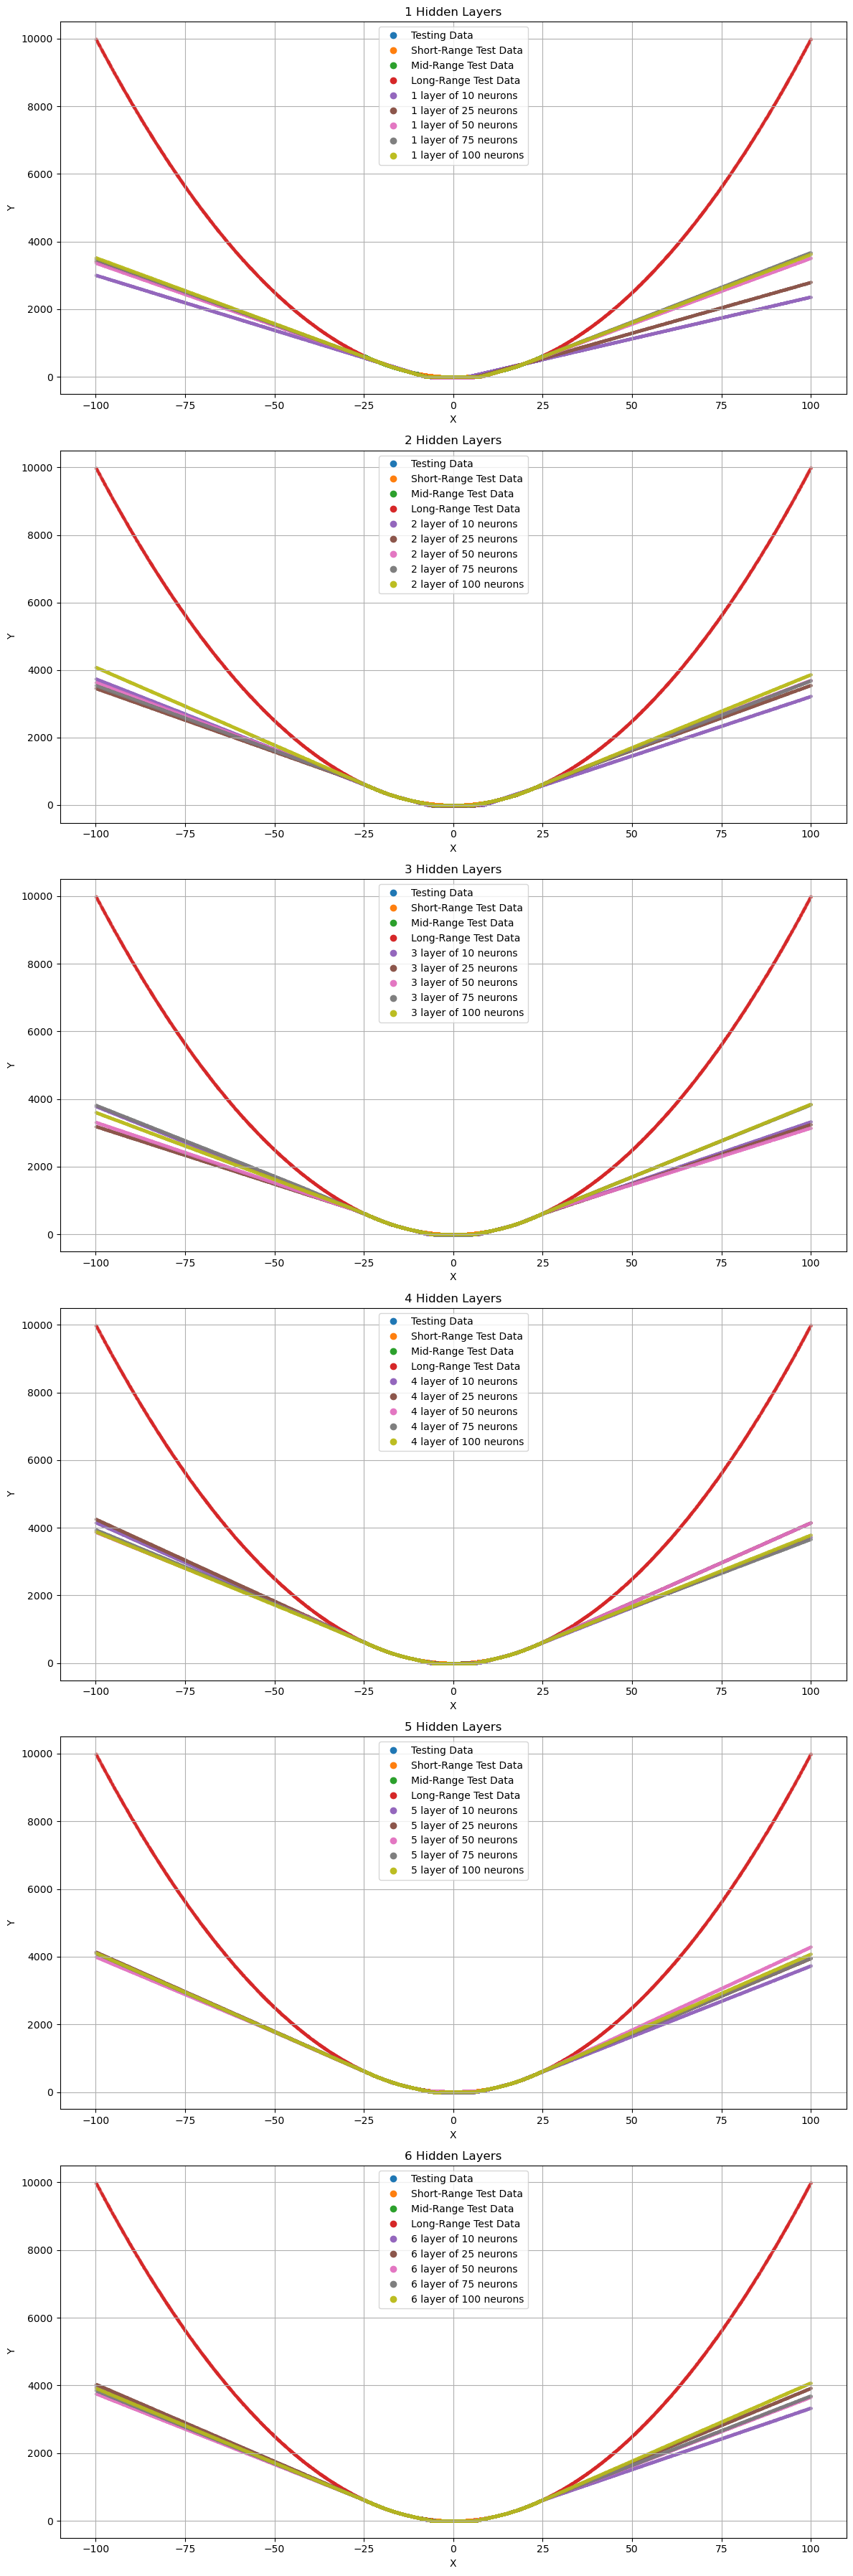


--- Test Results Summary ---
    num_layers  neurons_per_layer  loss_on_range  loss_short_range  \
0            1                 10    1463.950073        860.618530   
1            1                 25     439.981354        606.726685   
2            1                 50     103.833549       1002.137512   
3            1                 75      59.035038        847.040710   
4            1                100      55.753632        818.551819   
5            2                 10     155.189880       1071.943604   
6            2                 25      11.135517        969.372803   
7            2                 50       0.482891        401.054413   
8            2                 75       0.099930        367.289886   
9            2                100       0.086566        194.027344   
10           3                 10      18.035318        513.841736   
11           3                 25       2.781661        316.947113   
12           3                 50       0.674889        283.

In [7]:
# Define the range of hidden layers and neurons per layer to test
num_layers_list = range(1, 7) # 1 to 6 hidden layers
neurons_list = [10, 25, 50, 75, 100] # Number of neurons in each layer

# List to store results
results_list = []
loss_on_range_1_input = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)
loss_short_range_1_input = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)
loss_mid_range_1_input = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)
loss_long_range_1_input = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)

# Create a figure and a set of subplots
fig, axes = plt.subplots(len(num_layers_list), 1, figsize=(12, 6 * len(num_layers_list)))
total_x_range = np.concatenate((X_test_short_range_1_input, X_test_mid_range_1_input, X_test_long_range_1_input))
# total_y_range = np.concatenate((y_test_1_input, Y_test_mid_range_1_input, Y_test_long_range_1_input)) # This variable is not used in the plot

# Loop through each combination of layers and neurons
for i, num_layers in enumerate(num_layers_list):

    # Get the correct axes object based on the number of subplots
    if len(num_layers_list) == 1:
        ax = axes
    else:
        ax = axes[i]

    # Plot the static data points with low alpha
    handles, labels = ax.get_legend_handles_labels()
    real_data = ax.scatter(X_test_1_input, y_test_1_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Testing Data')
    handles.append(dummy_handle)
    labels.append(f'Testing Data')
    real_data = ax.scatter(X_test_short_range_1_input, Y_test_short_range_1_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Short-Range Test Data')
    handles.append(dummy_handle)
    labels.append(f'Short-Range Test Data')
    real_data = ax.scatter(X_test_mid_range_1_input, Y_test_mid_range_1_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Mid-Range Test Data')
    handles.append(dummy_handle)
    labels.append(f'Mid-Range Test Data')
    real_data = ax.scatter(X_test_long_range_1_input, Y_test_long_range_1_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Long-Range Test Data')
    handles.append(dummy_handle)
    labels.append(f'Long-Range Test Data')

    # Lists to store handles and labels for the legend
    # Get handles/labels from static data plots first
    handles, labels = ax.get_legend_handles_labels()

    for neurons_per_layer in neurons_list:
        print(f"Testing {num_layers} layers with {neurons_per_layer} neurons per layer...")

        # Define the hidden layer sizes for the current configuration
        hidden_layer_sizes = [neurons_per_layer] * num_layers

        # Create the model using the function defined previously
        # Note: create_mlp_model prints model summary, which will appear for each model
        model, history, losses = test_mlp_model(hidden_layer_sizes,
                                                X_train_1_input, y_train_1_input,
                                                X_val_1_input, y_val_1_input,
                                                X_test_1_input, y_test_1_input,
                                                X_test_short_range_1_input, Y_test_short_range_1_input,
                                                X_test_mid_range_1_input, Y_test_mid_range_1_input,
                                                X_test_long_range_1_input, Y_test_long_range_1_input,
                                                epochs=100, batch_size=32, verbose=1, 
                                                l2_reg=0.0, plot_history=False)
        
        
        loss_on_range_1_input.loc[num_layers, neurons_per_layer] = losses['on range']
        loss_short_range_1_input.loc[num_layers, neurons_per_layer] = losses['short range']
        loss_mid_range_1_input.loc[num_layers, neurons_per_layer] = losses['mid range']
        loss_long_range_1_input.loc[num_layers, neurons_per_layer] = losses['long range']

        # plot the test results with low alpha
        scatter_pred = ax.scatter(total_x_range, model.predict(total_x_range, verbose=0), alpha=0.1, s=5)

        # Get the color used for this scatter plot
        color = scatter_pred.get_facecolor()[0]

        # Create a dummy plot element with alpha=1.0 for the legend handle
        # Use a line plot with a marker for the legend handle
        dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'{num_layers} layer of {neurons_per_layer} neurons')

        # Add the dummy handle and label to the lists
        handles.append(dummy_handle)
        labels.append(f'{num_layers} layer of {neurons_per_layer} neurons')


        # Store the results in a dictionary
        results_list.append({
            'num_layers': num_layers,
            'neurons_per_layer': neurons_per_layer,
            'loss_on_range': losses['on range'],
            'loss_short_range': losses['short range'],
            'loss_mid_range': losses['mid range'],
            'loss_long_range': losses['long range']
        })

    # # Set the y-axis to log scale
    # ax.set_yscale('log')

    # Add labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y') 
    # ax.set_ylabel('Y (log scale)') # Update label to reflect log scale
    ax.set_title(f'{num_layers} Hidden Layers')

    # Add the legend using the collected handles and labels
    ax.legend(handles=handles, labels=labels)

    ax.grid(True)

plt.tight_layout()
plt.show()

# Convert the list of results into a pandas DataFrame
results_df = pd.DataFrame(results_list)

# Display the resulting DataFrame
print("\n--- Test Results Summary ---")
print(results_df)

#### Compare predictions errors on range and out of range

Text(70.72222222222221, 0.5, 'Number of Hidden Layers')

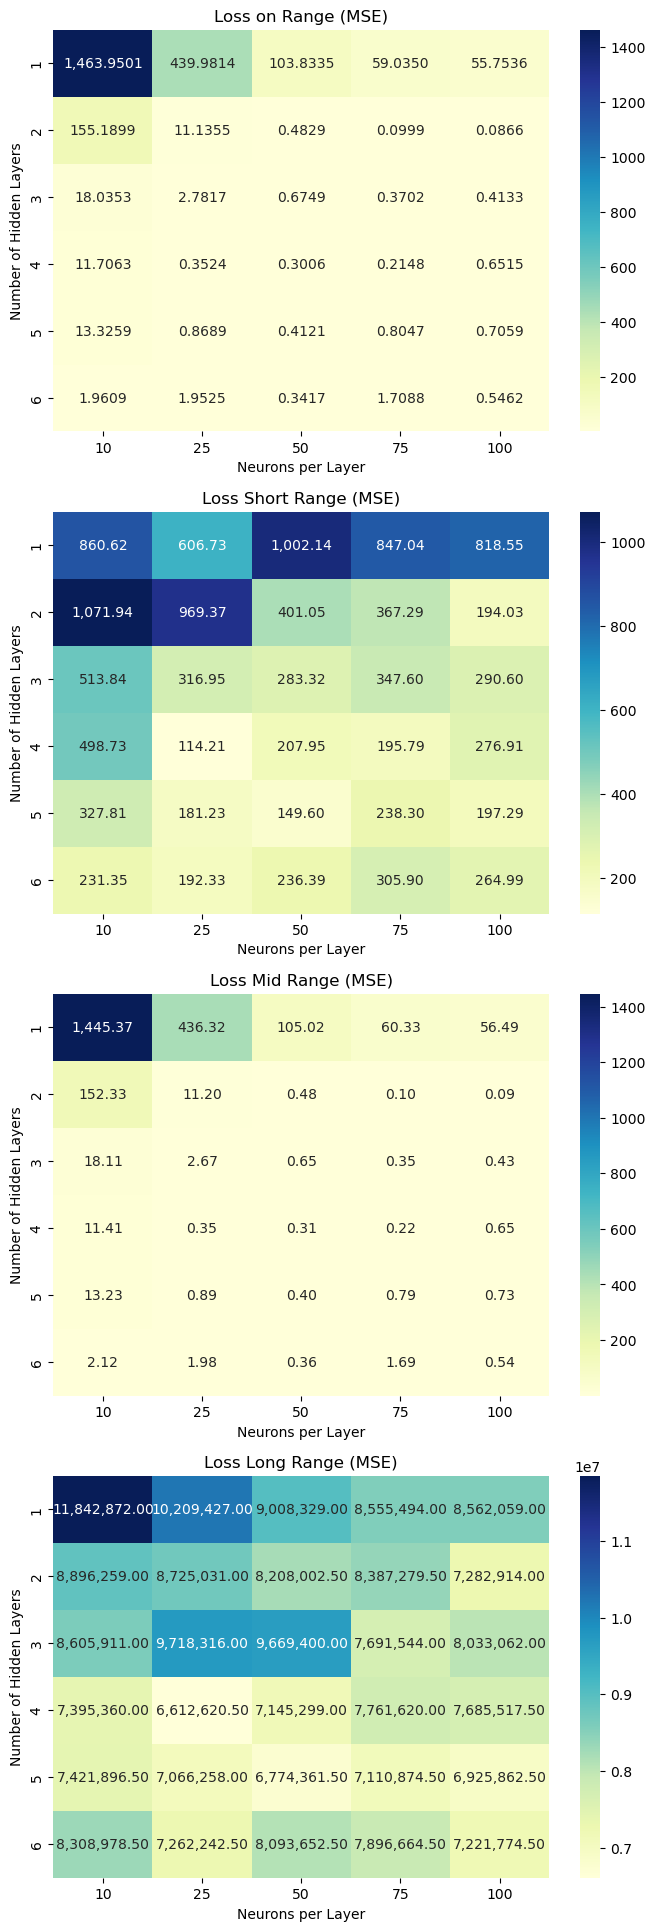

In [8]:
# loss_on_range.info()
# loss_mid_range
# loss_long_range

fig, axes = plt.subplots(4, 1, figsize=(8, 4 * len(num_layers_list)))

sns.heatmap(loss_on_range_1_input, annot=True, fmt=",.4f", cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Loss on Range (MSE)")
axes[0].set_xlabel("Neurons per Layer")
axes[0].set_ylabel("Number of Hidden Layers")
# plt.show()
sns.heatmap(loss_short_range_1_input, annot=True, fmt=",.2f", cmap="YlGnBu", ax=axes[1])
axes[1].set_title("Loss Short Range (MSE)")
axes[1].set_xlabel("Neurons per Layer")
axes[1].set_ylabel("Number of Hidden Layers")
# plt.show()
sns.heatmap(loss_mid_range_1_input, annot=True, fmt=",.2f", cmap="YlGnBu", ax=axes[2])
axes[2].set_title("Loss Mid Range (MSE)")
axes[2].set_xlabel("Neurons per Layer")
axes[2].set_ylabel("Number of Hidden Layers")
# plt.show()
sns.heatmap(loss_long_range_1_input, annot=True, fmt=",.2f", cmap="YlGnBu", ax=axes[3])
axes[3].set_title("Loss Long Range (MSE)")
axes[3].set_xlabel("Neurons per Layer")
axes[3].set_ylabel("Number of Hidden Layers")
# plt.show()


### One input conclusion

The results we got for the one input case are a little different than what we have been told to expect.
In our tests we didn't saw the strong correlation between network size or depth to its quality, like we were told should happen, and even the connection between layers size and quality is not dramatic.
we got pretty good on-range results from network at the small end of the tested network sizes.

But the results we got on the out-of-range data have shown that none of the networks had truly generalized (even when we given it the simplest function we could). 
The out-of-range outputs show that out of range, all the networks do a linear interpolation/extrapolation of the closest points, which doesn't really work for the truly non-linear function we had as a hidden function.

### A solution?

The solution that was originally given is simple, if you think something may be needed, just add it in the input!.
so in this one input case just also give $x^2$ as an additional input

#### add x**2 to the input data

In [9]:

# x_values_1_input_s = np.column_stack((x_values_1_input, x_values_1_input**2))
# x_values_1_input_s
X_train_1_input_s = np.column_stack((X_train_1_input, X_train_1_input**2))
X_test_1_input_s = np.column_stack((X_test_1_input, X_test_1_input**2))
X_val_1_input_s = np.column_stack((X_val_1_input, X_val_1_input**2))

X_test_short_range_1_input_s = np.column_stack((X_test_short_range_1_input, X_test_short_range_1_input**2))
X_test_mid_range_1_input_s = np.column_stack((X_test_mid_range_1_input, X_test_mid_range_1_input**2))
X_test_long_range_1_input_s = np.column_stack((X_test_long_range_1_input, X_test_long_range_1_input**2))


#### Test with the added data

Testing 1 layers with 10 neurons per layer...


Model: "mlp_model with_1_hidden_layers of sizes [10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 49356.0859 - val_loss: 2031.5939
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 795.5273 - val_loss: 10.6243
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.2224 - val_loss: 3.2970
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.4656 - val_loss: 0.8351
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6006 - val_loss: 0.1844
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1391 - val_loss: 0.0594
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0533 - val_loss: 0.0417
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0403 - val_loss: 0.0397
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0398 - val_loss: 0.0392
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0394 - val_loss: 0.0388
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0377 - val_loss: 0.0383
Epoch 12/100
188/188 ━━━━━━━━━━

Model: "mlp_model with_1_hidden_layers of sizes [25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 108941.7812 - val_loss: 10964.0801
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4636.3047 - val_loss: 22.9102
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 16.0830 - val_loss: 6.2475
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.7314 - val_loss: 1.6341
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1748 - val_loss: 0.3622
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2640 - val_loss: 0.1003
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0848 - val_loss: 0.0608
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0585 - val_loss: 0.0563
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0560 - val_loss: 0.0556
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0558 - val_loss: 0.0550
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0539 - val_loss: 0.0544
Epoch 12/100
188/188 ━━━━━━

Model: "mlp_model with_1_hidden_layers of sizes [50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201 (804.00 B)

 Trainable params: 201 (804.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 112973.3828 - val_loss: 5703.8164
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1974.9771 - val_loss: 0.2443
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1887 - val_loss: 0.1231
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1169 - val_loss: 0.1024
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0995 - val_loss: 0.0988
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0965 - val_loss: 0.0978
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0952 - val_loss: 0.0968
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0975 - val_loss: 0.0959
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0942 - val_loss: 0.0947
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0939 - val_loss: 0.0935
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0930 - val_loss: 0.0921
Epoch 12/100
188/188 ━━━━━━━━━

Model: "mlp_model with_1_hidden_layers of sizes [75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 70849.6562 - val_loss: 1.2864
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8846 - val_loss: 0.1949
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1462 - val_loss: 0.0763
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0752 - val_loss: 0.0703
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0688 - val_loss: 0.0700
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0683 - val_loss: 0.0683
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0682 - val_loss: 0.0672
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0672 - val_loss: 0.0664
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0648 - val_loss: 0.0648
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0633 - val_loss: 0.0626
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0630 - val_loss: 0.0611
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━━

Model: "mlp_model with_1_hidden_layers of sizes [100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 57898.1875 - val_loss: 1.6583
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.9505 - val_loss: 0.1259
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0976 - val_loss: 0.0793
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0777 - val_loss: 0.0779
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0763 - val_loss: 0.0765
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0760 - val_loss: 0.0750
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0747 - val_loss: 0.0731
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0715 - val_loss: 0.0711
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0715 - val_loss: 0.0691
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0677 - val_loss: 0.0665
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0657 - val_loss: 0.0641
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━━

Model: "mlp_model with_2_hidden_layers of sizes [10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 85541.3047 - val_loss: 2073.4976
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 578.1206 - val_loss: 2.7667
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9020 - val_loss: 0.4278
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2830 - val_loss: 0.0935
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0761 - val_loss: 0.0640
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0617 - val_loss: 0.0614
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0604 - val_loss: 0.0601
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0585 - val_loss: 0.0585
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0574 - val_loss: 0.0570
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0564 - val_loss: 0.0555
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0543 - val_loss: 0.0542
Epoch 12/100
188/188 ━━━━━━━━━━━

Model: "mlp_model with_2_hidden_layers of sizes [25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 751 (2.93 KB)

 Trainable params: 751 (2.93 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 49019.0820 - val_loss: 90.5009
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 65.4286 - val_loss: 19.1488
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 12.9728 - val_loss: 2.5241
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.5822 - val_loss: 0.2203
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1350 - val_loss: 0.0329
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0285 - val_loss: 0.0245
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0250 - val_loss: 0.0239
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0235 - val_loss: 0.0237
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0234 - val_loss: 0.0230
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0233 - val_loss: 0.0226
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0223 - val_loss: 0.0222
Epoch 12/100
188/188 ━━━━━━━━━━━━

Model: "mlp_model with_2_hidden_layers of sizes [50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,751 (10.75 KB)

 Trainable params: 2,751 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 36368.4766 - val_loss: 1.6046
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7015 - val_loss: 0.0233
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0203 - val_loss: 0.0190
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181 - val_loss: 0.0176
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174 - val_loss: 0.0163
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0155 - val_loss: 0.0147
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0141 - val_loss: 0.0134
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0131 - val_loss: 0.0125
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0125 - val_loss: 0.0117
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0111 - val_loss: 0.0114
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0110 - val_loss: 0.0102
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━━

Model: "mlp_model with_2_hidden_layers of sizes [75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,001 (23.44 KB)

 Trainable params: 6,001 (23.44 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 26794.1621 - val_loss: 0.1909
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0874 - val_loss: 0.0230
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0229 - val_loss: 0.0220
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0207 - val_loss: 0.0211
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0209 - val_loss: 0.0194
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0190 - val_loss: 0.0192
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0180 - val_loss: 0.0164
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0158 - val_loss: 0.0148
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0145 - val_loss: 0.0131
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0130 - val_loss: 0.0115
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0111 - val_loss: 0.0102
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━━

Model: "mlp_model with_2_hidden_layers of sizes [100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,501 (41.02 KB)

 Trainable params: 10,501 (41.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 20588.2012 - val_loss: 0.0535
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0462 - val_loss: 0.0409
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0405 - val_loss: 0.0390
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0380 - val_loss: 0.0358
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0357 - val_loss: 0.0328
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0320 - val_loss: 0.0294
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0287 - val_loss: 0.0277
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0251 - val_loss: 0.0214
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0203 - val_loss: 0.0172
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0163 - val_loss: 0.0129
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0124 - val_loss: 0.0107
Epoch 12/100
188/188 ━━━━━━━━━━━━━━

Model: "mlp_model with_3_hidden_layers of sizes [10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 116764.4219 - val_loss: 5448.8179
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1363.5710 - val_loss: 64.4790
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 53.5258 - val_loss: 28.2714
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 22.7016 - val_loss: 10.7021
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 8.2882 - val_loss: 3.4818
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.5978 - val_loss: 0.9876
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7318 - val_loss: 0.2900
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2274 - val_loss: 0.1279
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1132 - val_loss: 0.0879
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0819 - val_loss: 0.0747
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0737 - val_loss: 0.0721
Epoch 12/100
188/188 ━━━━

Model: "mlp_model with_3_hidden_layers of sizes [25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,401 (5.47 KB)

 Trainable params: 1,401 (5.47 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 24023.0703 - val_loss: 0.2127
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1112 - val_loss: 0.0149
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0138 - val_loss: 0.0129
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0128 - val_loss: 0.0125
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0123 - val_loss: 0.0122
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0124 - val_loss: 0.0117
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0113 - val_loss: 0.0111
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0112 - val_loss: 0.0106
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0106 - val_loss: 0.0101
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0091 - val_loss: 0.0094
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━━

Model: "mlp_model with_3_hidden_layers of sizes [50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,301 (20.71 KB)

 Trainable params: 5,301 (20.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 33494.2188 - val_loss: 0.1358
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1173 - val_loss: 0.0923
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0576 - val_loss: 0.0355
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0344 - val_loss: 0.0309
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0300 - val_loss: 0.0316
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0247 - val_loss: 0.0214
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0207 - val_loss: 0.0169
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0158 - val_loss: 0.0122
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0112 - val_loss: 0.0080
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0070 - val_loss: 0.0044
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0038 - val_loss: 0.0021
Epoch 12/100
188/188 ━━━━━━━━━━━━━

Model: "mlp_model with_3_hidden_layers of sizes [75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,701 (45.71 KB)

 Trainable params: 11,701 (45.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 26067.9219 - val_loss: 0.2626
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1176 - val_loss: 0.0272
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0265 - val_loss: 0.0265
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0251 - val_loss: 0.0246
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0244 - val_loss: 0.0232
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0232 - val_loss: 0.0222
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0213 - val_loss: 0.0204
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0203 - val_loss: 0.0183
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0179 - val_loss: 0.0163
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0162 - val_loss: 0.0147
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0141 - val_loss: 0.0131
Epoch 12/100
188/188 ━━━━━━━━

Model: "mlp_model with_3_hidden_layers of sizes [100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,601 (80.47 KB)

 Trainable params: 20,601 (80.47 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 21783.1719 - val_loss: 0.0519
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0341 - val_loss: 0.0250
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0247 - val_loss: 0.0225
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0214 - val_loss: 0.0188
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0184 - val_loss: 0.0162
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0156 - val_loss: 0.0149
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0133 - val_loss: 0.0118
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0115 - val_loss: 0.0101
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0095 - val_loss: 0.0084
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0078 - val_loss: 0.0080
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0070 - val_loss: 0.0060
Epoch 12/100
188/188 ━━━━━━━━━━

Model: "mlp_model with_4_hidden_layers of sizes [10, 10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 124833.3516 - val_loss: 479.0002
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 360.0455 - val_loss: 127.3471
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 95.2919 - val_loss: 34.3086
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 25.0756 - val_loss: 7.2897
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.0679 - val_loss: 1.5748
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.2029 - val_loss: 0.7443
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6869 - val_loss: 0.6161
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5976 - val_loss: 0.5809
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5648 - val_loss: 0.5538
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.5500 - val_loss: 0.5213
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5212 - val_loss: 0.4908
Epoch 12/100
188/188 ━━━━━

Model: "mlp_model with_4_hidden_layers of sizes [25, 25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,051 (8.01 KB)

 Trainable params: 2,051 (8.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 37397.2617 - val_loss: 7.3789
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.6528 - val_loss: 0.5495
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3070 - val_loss: 0.0393
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0313 - val_loss: 0.0240
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0231 - val_loss: 0.0210
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0199 - val_loss: 0.0173
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0166 - val_loss: 0.0141
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0139 - val_loss: 0.0120
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0116 - val_loss: 0.0111
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0110 - val_loss: 0.0101
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━━

Model: "mlp_model with_4_hidden_layers of sizes [50, 50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,851 (30.67 KB)

 Trainable params: 7,851 (30.67 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 37153.1016 - val_loss: 0.3738
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1867 - val_loss: 0.0201
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0182 - val_loss: 0.0152
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0140 - val_loss: 0.0129
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0128 - val_loss: 0.0121
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0122 - val_loss: 0.0112
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0111 - val_loss: 0.0102
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - val_loss: 0.0092
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0089 - val_loss: 0.0083
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0079 - val_loss: 0.0072
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0072 - val_loss: 0.0063
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━━

Model: "mlp_model with_4_hidden_layers of sizes [75, 75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,401 (67.97 KB)

 Trainable params: 17,401 (67.97 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 21590.5176 - val_loss: 0.0557
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0305 - val_loss: 0.0146
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0139 - val_loss: 0.0125
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0120 - val_loss: 0.0110
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0105 - val_loss: 0.0097
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0094 - val_loss: 0.0089
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0085 - val_loss: 0.0080
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0074 - val_loss: 0.0063
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0063 - val_loss: 0.0054
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0054 - val_loss: 0.0045
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0044 - val_loss: 0.0038
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━━

Model: "mlp_model with_4_hidden_layers of sizes [100, 100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,701 (119.93 KB)

 Trainable params: 30,701 (119.93 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 12135.0869 - val_loss: 0.0207
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0177 - val_loss: 0.0168
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0152 - val_loss: 0.0148
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0146 - val_loss: 0.0128
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0132 - val_loss: 0.0186
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0115 - val_loss: 0.0100
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0095 - val_loss: 0.0080
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0077 - val_loss: 0.0066
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0065 - val_loss: 0.0050
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0052 - val_loss: 0.0055
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━

Model: "mlp_model with_5_hidden_layers of sizes [10, 10, 10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 109783.5000 - val_loss: 17.1165
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 12.9612 - val_loss: 5.3854
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.2431 - val_loss: 1.6561
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2458 - val_loss: 0.4955
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3984 - val_loss: 0.2421
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2251 - val_loss: 0.2002
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2028 - val_loss: 0.1936
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1862 - val_loss: 0.1862
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1809 - val_loss: 0.1776
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1762 - val_loss: 0.1723
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1667 - val_loss: 0.1633
Epoch 12/100
188/188 ━━━━━━━━━━━━━

Model: "mlp_model with_5_hidden_layers of sizes [25, 25, 25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,701 (10.55 KB)

 Trainable params: 2,701 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 61693.7969 - val_loss: 0.7057
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4739 - val_loss: 0.2016
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1946 - val_loss: 0.1865
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1869 - val_loss: 0.1797
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1802 - val_loss: 0.1704
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1683 - val_loss: 0.1624
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1567 - val_loss: 0.1524
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1480 - val_loss: 0.1405
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1393 - val_loss: 0.1321
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1251 - val_loss: 0.1168
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1174 - val_loss: 0.1107
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━

Model: "mlp_model with_5_hidden_layers of sizes [50, 50, 50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,401 (40.63 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 39526.1953 - val_loss: 0.3445
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2103 - val_loss: 0.1258
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1237 - val_loss: 0.1161
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1124 - val_loss: 0.1093
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1089 - val_loss: 0.1056
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0998 - val_loss: 0.0945
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0906 - val_loss: 0.1099
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0817 - val_loss: 0.0738
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0735 - val_loss: 0.0638
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0645 - val_loss: 0.0550
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0545 - val_loss: 0.0470
Epoch 12/100
188/188 ━━━━━━━━━

Model: "mlp_model with_5_hidden_layers of sizes [75, 75, 75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,101 (90.24 KB)

 Trainable params: 23,101 (90.24 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 24322.6543 - val_loss: 0.1094
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1066 - val_loss: 0.0958
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0919 - val_loss: 0.1017
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0801 - val_loss: 0.0680
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0674 - val_loss: 0.0565
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0570 - val_loss: 0.0469
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0484 - val_loss: 0.0392
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0375 - val_loss: 0.0345
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0313 - val_loss: 0.0259
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0252 - val_loss: 0.0226
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0191 - val_loss: 0.0170
Epoch 12/100
188/188 ━━━━━━━━━━━━━━

Model: "mlp_model with_5_hidden_layers of sizes [100, 100, 100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,801 (159.38 KB)

 Trainable params: 40,801 (159.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 16936.5293 - val_loss: 0.0354
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0332 - val_loss: 0.0300
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0288 - val_loss: 0.0254
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0243 - val_loss: 0.0217
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0211 - val_loss: 0.0167
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0161 - val_loss: 0.0134
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0126 - val_loss: 0.0100
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0100 - val_loss: 0.0073
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0071 - val_loss: 0.0053
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0049 - val_loss: 0.0053
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0039 - val_loss: 0.0026
Epoch 12/100
188/188 ━━━━━

Model: "mlp_model with_6_hidden_layers of sizes [10, 10, 10, 10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591 (2.31 KB)

 Trainable params: 591 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 73826.4297 - val_loss: 0.3459
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2097 - val_loss: 0.1943
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1908 - val_loss: 0.1889
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1833 - val_loss: 0.1848
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1819 - val_loss: 0.1785
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1740 - val_loss: 0.1723
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1704 - val_loss: 0.1649
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1630 - val_loss: 0.1580
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1540 - val_loss: 0.1508
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1451 - val_loss: 0.1422
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1399 - val_loss: 0.1323
Epoch 12/100
188/188 ━━━━━━━━━━━━━

Model: "mlp_model with_6_hidden_layers of sizes [25, 25, 25, 25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,351 (13.09 KB)

 Trainable params: 3,351 (13.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 69740.7500 - val_loss: 0.1380
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1252 - val_loss: 0.1165
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1161 - val_loss: 0.1114
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1108 - val_loss: 0.1062
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1046 - val_loss: 0.1042
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0985 - val_loss: 0.0980
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0914 - val_loss: 0.0855
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0839 - val_loss: 0.0785
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0762 - val_loss: 0.0712
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0686 - val_loss: 0.0646
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0620 - val_loss: 0.0549
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━━

Model: "mlp_model with_6_hidden_layers of sizes [50, 50, 50, 50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,951 (50.59 KB)

 Trainable params: 12,951 (50.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 27216.5781 - val_loss: 0.0549
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0538 - val_loss: 0.0526
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0506 - val_loss: 0.0487
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0462 - val_loss: 0.0422
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0419 - val_loss: 0.0378
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0389 - val_loss: 0.0338
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0327 - val_loss: 0.0285
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0280 - val_loss: 0.0269
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0251 - val_loss: 0.0196
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0197 - val_loss: 0.0208
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0161 - val_loss: 0.0130
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━━

Model: "mlp_model with_6_hidden_layers of sizes [75, 75, 75, 75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,801 (112.50 KB)

 Trainable params: 28,801 (112.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 34394.6016 - val_loss: 0.1593
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0909 - val_loss: 0.0589
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0583 - val_loss: 0.0530
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0518 - val_loss: 0.0493
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0490 - val_loss: 0.0427
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0414 - val_loss: 0.0360
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0366 - val_loss: 0.0350
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0302 - val_loss: 0.0251
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0260 - val_loss: 0.0198
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0200 - val_loss: 0.0154
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0157 - val_loss: 0.0139
Epoch 12/100
188/188 ━━━━━━━

Model: "mlp_model with_6_hidden_layers of sizes [100, 100, 100, 100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,901 (198.83 KB)

 Trainable params: 50,901 (198.83 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 21012.0781 - val_loss: 0.3009
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1271 - val_loss: 0.0199
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0194 - val_loss: 0.0182
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0171 - val_loss: 0.0157
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0155 - val_loss: 0.0134
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0133 - val_loss: 0.0125
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0110 - val_loss: 0.0095
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0095 - val_loss: 0.0081
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0075 - val_loss: 0.0073
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0064 - val_loss: 0.0073
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0051 - val_loss: 0.0037
Epoch 12/100
188/188 ━━━━━

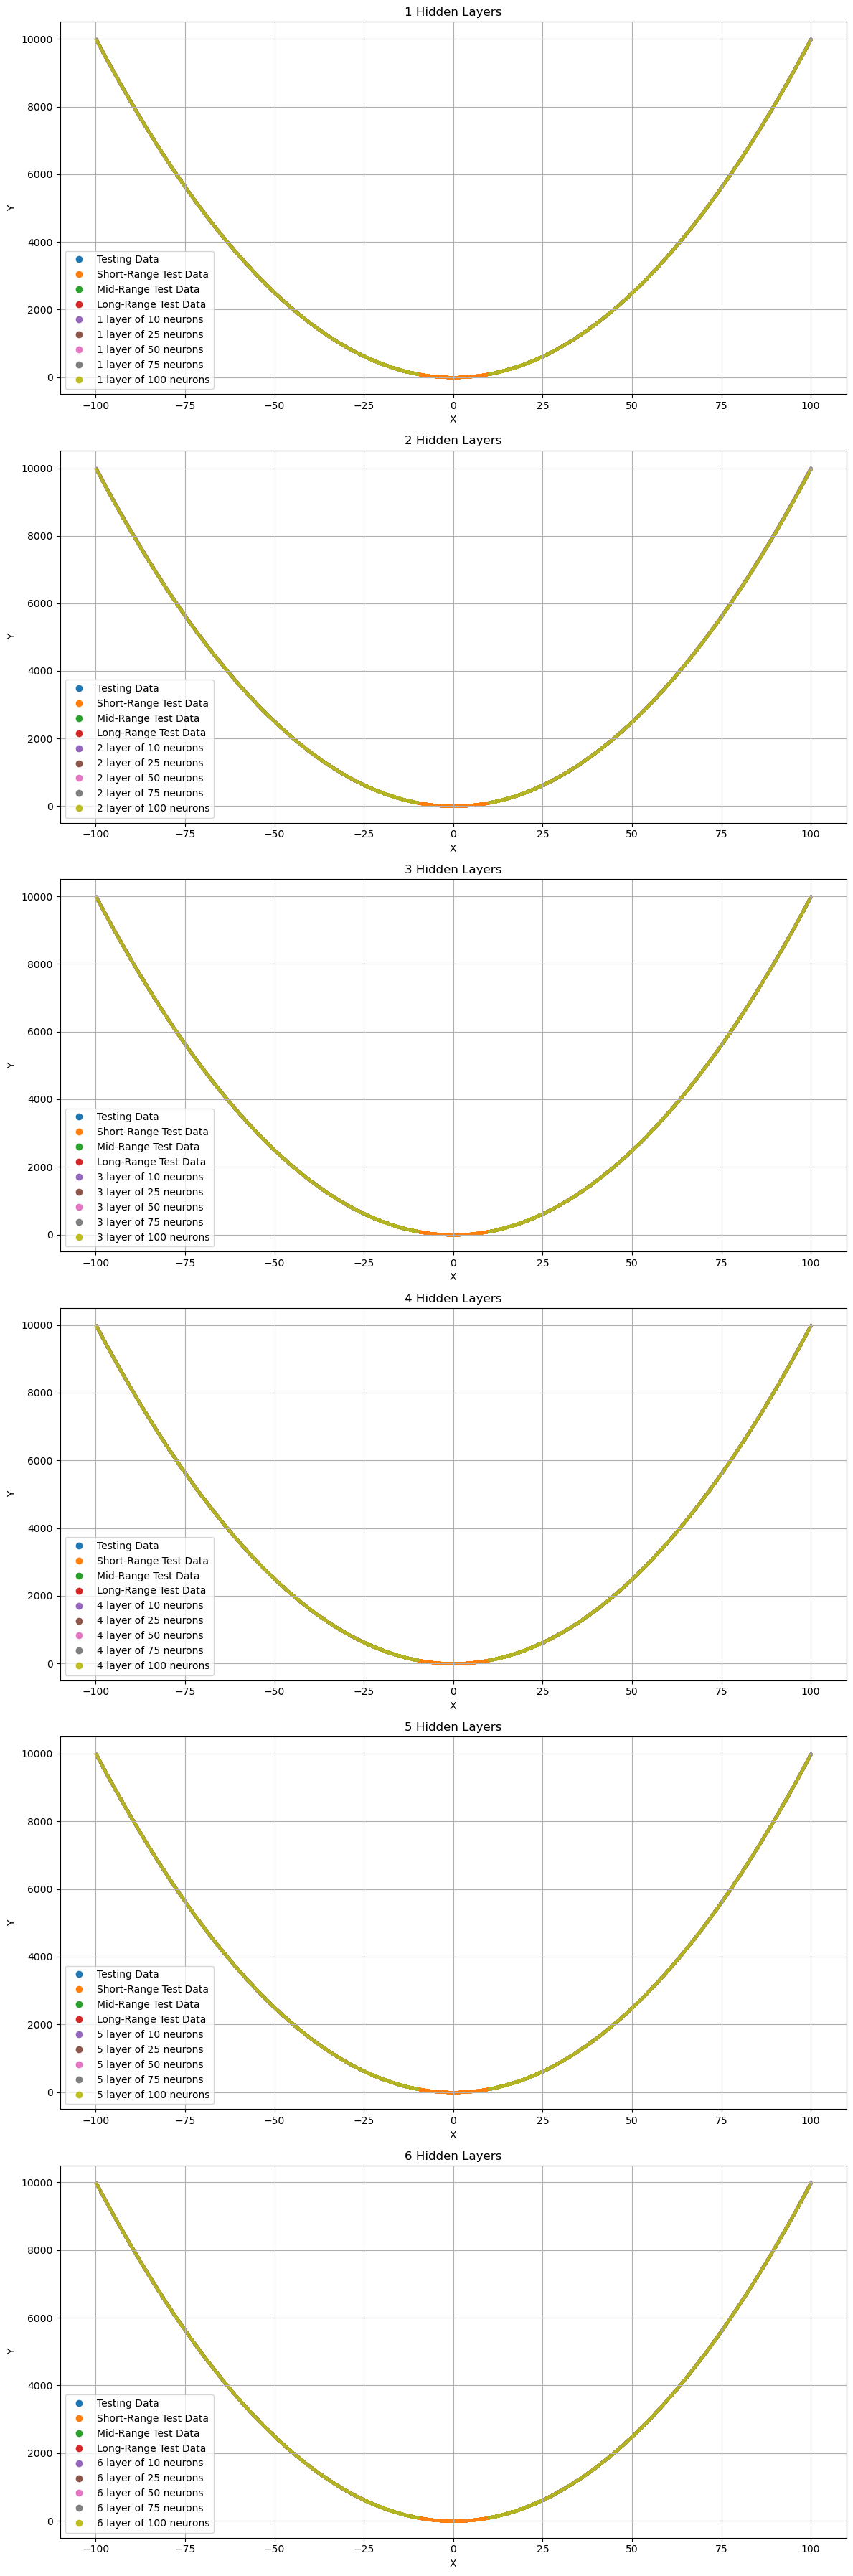


--- Test Results Summary ---
    num_layers  neurons_per_layer  loss_on_range  loss_short_range  \
0            1                 10   1.070082e-04          0.020028   
1            1                 25   3.348402e-04          0.055101   
2            1                 50   8.372377e-05          0.008420   
3            1                 75   2.882521e-05          0.006402   
4            1                100   2.541190e-06          0.003517   
5            2                 10   3.578195e-03          0.274106   
6            2                 25   5.688828e-07          0.073273   
7            2                 50   6.415032e-05          0.100772   
8            2                 75   8.729433e-06          0.003149   
9            2                100   7.637776e-06          0.000968   
10           3                 10   5.368479e-05          0.010073   
11           3                 25   2.879329e-05          0.043543   
12           3                 50   2.246164e-05          0.

In [10]:
# Define the range of hidden layers and neurons per layer to test
num_layers_list = range(1, 7) # 1 to 6 hidden layers
neurons_list = [10, 25, 50, 75, 100] # Number of neurons in each layer

# List to store results
results_list = []
loss_on_range_1_input_s = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)
loss_short_range_1_input_s = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)
loss_mid_range_1_input_s = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)
loss_long_range_1_input_s = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)

# Create a figure and a set of subplots
fig, axes = plt.subplots(len(num_layers_list), 1, figsize=(12, 6 * len(num_layers_list)))
total_x_range_s = np.concatenate((X_test_1_input_s, X_test_mid_range_1_input_s, X_test_long_range_1_input_s))
# total_y_range = np.concatenate((y_test_1_input, Y_test_mid_range_1_input, Y_test_long_range_1_input)) # This variable is not used in the plot

# Loop through each combination of layers and neurons
for i, num_layers in enumerate(num_layers_list):

    # Get the correct axes object based on the number of subplots
    if len(num_layers_list) == 1:
        ax = axes
    else:
        ax = axes[i]

    # Plot the static data points with low alpha
    handles, labels = ax.get_legend_handles_labels()
    real_data = ax.scatter(X_test_1_input, y_test_1_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Testing Data')
    handles.append(dummy_handle)
    labels.append(f'Testing Data')
    real_data = ax.scatter(X_test_short_range_1_input, Y_test_short_range_1_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Short-Range Test Data')
    handles.append(dummy_handle)
    labels.append(f'Short-Range Test Data')
    real_data = ax.scatter(X_test_mid_range_1_input, Y_test_mid_range_1_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Mid-Range Test Data')
    handles.append(dummy_handle)
    labels.append(f'Mid-Range Test Data')
    real_data = ax.scatter(X_test_long_range_1_input, Y_test_long_range_1_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Long-Range Test Data')
    handles.append(dummy_handle)
    labels.append(f'Long-Range Test Data')

    # Lists to store handles and labels for the legend
    # Get handles/labels from static data plots first
    handles, labels = ax.get_legend_handles_labels()

    for neurons_per_layer in neurons_list:
        print(f"Testing {num_layers} layers with {neurons_per_layer} neurons per layer...")

        # Define the hidden layer sizes for the current configuration
        hidden_layer_sizes = [neurons_per_layer] * num_layers

        # Create the model using the function defined previously
        # Note: create_mlp_model prints model summary, which will appear for each model
        model, history, losses = test_mlp_model(hidden_layer_sizes,
                                                X_train_1_input_s, y_train_1_input,
                                                X_val_1_input_s, y_val_1_input,
                                                X_test_1_input_s, y_test_1_input,
                                                X_test_short_range_1_input_s, Y_test_short_range_1_input,
                                                X_test_mid_range_1_input_s, Y_test_mid_range_1_input,
                                                X_test_long_range_1_input_s, Y_test_long_range_1_input,
                                                epochs=100, batch_size=32, verbose=1, 
                                                l2_reg=0.0, plot_history=False)
        
        
        loss_on_range_1_input_s.loc[num_layers, neurons_per_layer] = losses['on range']
        loss_short_range_1_input_s.loc[num_layers, neurons_per_layer] = losses['short range']
        loss_mid_range_1_input_s.loc[num_layers, neurons_per_layer] = losses['mid range']
        loss_long_range_1_input_s.loc[num_layers, neurons_per_layer] = losses['long range']

        # plot the test results with low alpha
        scatter_pred = ax.scatter(total_x_range_s[:,0], model.predict(total_x_range_s, verbose=0), alpha=0.1, s=5)

        # Get the color used for this scatter plot
        color = scatter_pred.get_facecolor()[0]

        # Create a dummy plot element with alpha=1.0 for the legend handle
        # Use a line plot with a marker for the legend handle
        dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'{num_layers} layer of {neurons_per_layer} neurons')

        # Add the dummy handle and label to the lists
        handles.append(dummy_handle)
        labels.append(f'{num_layers} layer of {neurons_per_layer} neurons')


        # Store the results in a dictionary
        results_list.append({
            'num_layers': num_layers,
            'neurons_per_layer': neurons_per_layer,
            'loss_on_range': losses['on range'],
            'loss_short_range': losses['short range'],
            'loss_mid_range': losses['mid range'],
            'loss_long_range': losses['long range']
        })

    # # Set the y-axis to log scale
    # ax.set_yscale('log')

    # Add labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y') 
    # ax.set_ylabel('Y (log scale)') # Update label to reflect log scale
    ax.set_title(f'{num_layers} Hidden Layers')

    # Add the legend using the collected handles and labels
    ax.legend(handles=handles, labels=labels)

    ax.grid(True)

plt.tight_layout()
plt.show()

# Convert the list of results into a pandas DataFrame
results_df = pd.DataFrame(results_list)

# Display the resulting DataFrame
print("\n--- Test Results Summary ---")
print(results_df)

##### Compare predictions errors on range and out of range

Text(70.72222222222221, 0.5, 'Number of Hidden Layers')

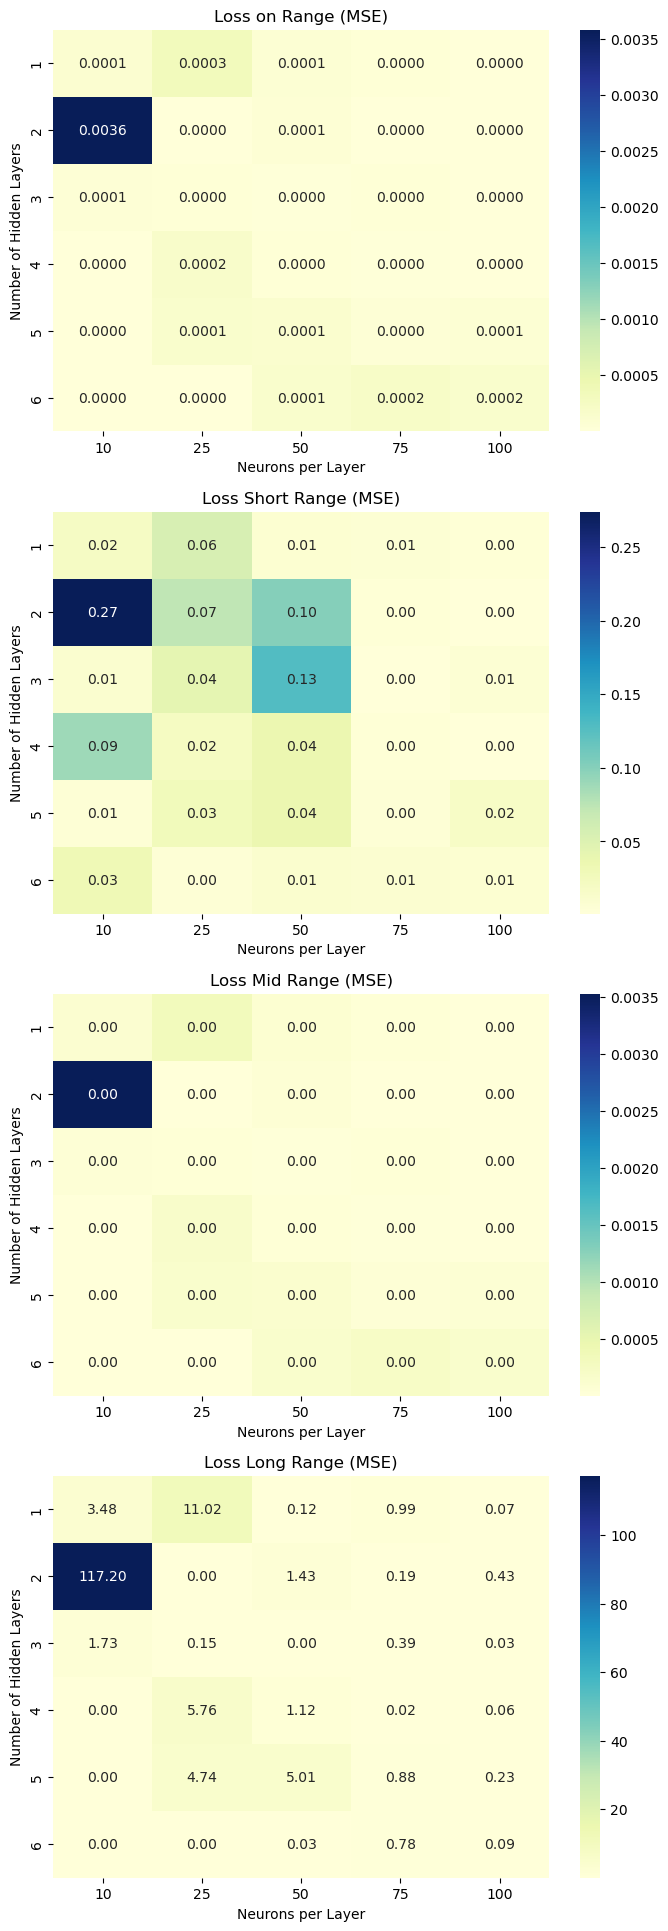

In [11]:
# loss_on_range.info()
# loss_mid_range
# loss_long_range

fig, axes = plt.subplots(4, 1, figsize=(8, 4 * len(num_layers_list)))

sns.heatmap(loss_on_range_1_input_s, annot=True, fmt=",.4f", cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Loss on Range (MSE)")
axes[0].set_xlabel("Neurons per Layer")
axes[0].set_ylabel("Number of Hidden Layers")
# plt.show()
sns.heatmap(loss_short_range_1_input_s, annot=True, fmt=",.2f", cmap="YlGnBu", ax=axes[1])
axes[1].set_title("Loss Short Range (MSE)")
axes[1].set_xlabel("Neurons per Layer")
axes[1].set_ylabel("Number of Hidden Layers")
# plt.show()
sns.heatmap(loss_mid_range_1_input_s, annot=True, fmt=",.2f", cmap="YlGnBu", ax=axes[2])
axes[2].set_title("Loss Mid Range (MSE)")
axes[2].set_xlabel("Neurons per Layer")
axes[2].set_ylabel("Number of Hidden Layers")
# plt.show()
sns.heatmap(loss_long_range_1_input_s, annot=True, fmt=",.2f", cmap="YlGnBu", ax=axes[3])
axes[3].set_title("Loss Long Range (MSE)")
axes[3].set_xlabel("Neurons per Layer")
axes[3].set_ylabel("Number of Hidden Layers")
# plt.show()


## Two inputs

### Define the Hidden Function

For a two-input function, we can argue that the simplest non-linear function would be:

$$ z = x*y $$

This quadratic function represents a basic form of non-linearity, making it a fundamental example for analysis.
Having second powers by their own will be similar to a combination of the one-input case, so not interesting, and this is the simplest form of non-linear inputs interaction.


In [12]:

# Define the hidden function
def hidden_function2(x, y):
    """Hidden function: z = x*y"""
    return x*y

### Make the inputs and outputs
including splitting to train, validation and test,
and making tests data for out of range test.

In [13]:
# --- Define parameters (assuming these might be in a previous cell) ---
a1 = -10  # Lower bound for input x
b1 = 10   # Upper bound for input x
a2 = -25 # Lower bound for mid range test for input x
b2 = 25 # Upper bound for mid range test for input x
a3 = -100 # Lower bound for long range test for input x
b3 = 100 # Upper bound for long range test for input x
# ---------------------------------------------------------------------
num_points = 10000 # Number of data points to generate
train_ratio = 0.6
test_ratio = 0.2
validation_ratio = 0.2 # Note: train_ratio + test_ratio + validation_ratio should be 1.0
# ---------------------------------------------------------------------
test_on:str = "mid_range"  # Options: "short_range", "mid_range", "long_range"

# Ensure parameters are defined, provide defaults if not
try:
        a1
except NameError:
        a1 = -10
try:
        b1
except NameError:
        b1 = 10
try:
        num_points
except NameError:
        num_points = 1000
try:
        train_ratio
except NameError:
        train_ratio = 0.6
try:
        test_ratio
except NameError:
        test_ratio = 0.2
try:
        validation_ratio
except NameError:
        validation_ratio = 0.2

# Generate random input points between a1 and b1
# X_test_short_range and Y_test_short_range are for short-range testing
# Using uniform distribution for floats. Duplicates are highly improbable.
X_test_short_range_2_input = np.random.uniform(a1, b1, (num_points, 2))
# Calculate the corresponding y values using the hidden function
Y_test_short_range_2_input = hidden_function2(X_test_short_range_2_input[:, 0], X_test_short_range_2_input[:, 1])

# X_test_mid_range and Y_test_mid_range are for mid-range testing
# X_test_mid_range = np.concatenate((np.random.uniform([a2, a2], [a1, a1], (num_points//4, 2)), np.random.uniform([b1, b1], [b2, b2], (num_points//4, 2)), np.random.uniform([a2, b1], [a1, b2], (num_points//4, 2)), np.random.uniform([b1, a2], [b2, a1], (num_points//4, 2))), axis=0)
X_test_mid_range_2_input = np.concatenate((np.random.uniform([a2, a2], [a1, b2], (num_points//4, 2)), np.random.uniform([b1, a2], [b2, b2], (num_points//4, 2)), np.random.uniform([a2, b1], [b2, b2], (num_points//4, 2)), np.random.uniform([a2, a2], [b2, a1], (num_points//4, 2))), axis=0)
Y_test_mid_range_2_input = hidden_function2(X_test_mid_range_2_input[:, 0], X_test_mid_range_2_input[:, 1])
# X_test_long_range and Y_test_long_range are for long-range testing
# X_test_long_range = np.concatenate((np.random.uniform([a3, a3], [a2, a2], (num_points//4, 2)), np.random.uniform([b2, b2], [b3, b3], (num_points//4, 2)), np.random.uniform([a3, b2], [a2, b3], (num_points//4, 2)), np.random.uniform([b2, a3], [b3, a2], (num_points//4, 2))), axis=0)
X_test_long_range_2_input = np.concatenate((np.random.uniform([a3, a3], [a2, b3], (num_points//4, 2)), np.random.uniform([b2, a3], [b3, b3], (num_points//4, 2)), np.random.uniform([a3, b2], [b3, b3], (num_points//4, 2)), np.random.uniform([a3, a3], [b3, a2], (num_points//4, 2))), axis=0)
Y_test_long_range_2_input = hidden_function2(X_test_long_range_2_input[:, 0], X_test_long_range_2_input[:, 1])


if test_on == "short_range":
    # Use short range test data
    x_values_2_input = X_test_short_range_2_input
    y_values_2_input = Y_test_short_range_2_input
elif test_on == "mid_range":
    # Use mid range test data
    x_values_2_input = X_test_mid_range_2_input
    y_values_2_input = Y_test_mid_range_2_input
elif test_on == "long_range":
    # Use long range test data
    x_values_2_input = X_test_long_range_2_input
    y_values_2_input = Y_test_long_range_2_input

# Split the data into training, testing, and validation sets
# First, split into training and the rest (test + validation)
X_train_2_input, X_temp_2_input, y_train_2_input, y_temp_2_input = train_test_split(
        x_values_2_input, y_values_2_input, test_size=(test_ratio + validation_ratio), # random_state=42
)

# Second, split the rest (temp) into testing and validation
# The test_size here is the ratio of validation set size to the size of the temp set
test_val_ratio_in_temp = validation_ratio / (test_ratio + validation_ratio)
X_test_2_input, X_val_2_input, y_test_2_input, y_val_2_input = train_test_split(
        X_temp_2_input, y_temp_2_input, test_size=test_val_ratio_in_temp, # random_state=42
)

# The data is now split into:
# X_train_2_input, y_train_2_input
# X_test_2_input, y_test_2_input
# X_val_2_input, y_val_2_input
# X_test_mid_range_2_input, Y_test_mid_range_2_input
# X_test_long_range_2_input, Y_test_long_range_2_input

In [14]:
# x_test_mid_range_1 = np.random.uniform([a2, a2], [a1, a1], (num_points//4, 2))
# x_test_mid_range_2 = np.random.uniform([b1, b1], [b2, b2], (num_points//4, 2))
# x_test_mid_range_3 = np.random.uniform([a2, b1], [a1, b2], (num_points//4, 2))
# x_test_mid_range_4 = np.random.uniform([b1, a2], [b2, a1], (num_points//4, 2))

# X_test_mid_range = np.concatenate((x_test_mid_range_1, x_test_mid_range_2, x_test_mid_range_3, x_test_mid_range_4), axis=0)
# Y_test_mid_range = hidden_function2(X_test_mid_range[:, 0], X_test_mid_range[:, 1])

X_test_mid_range_2_input.shape, Y_test_mid_range_2_input.shape


((10000, 2), (10000,))

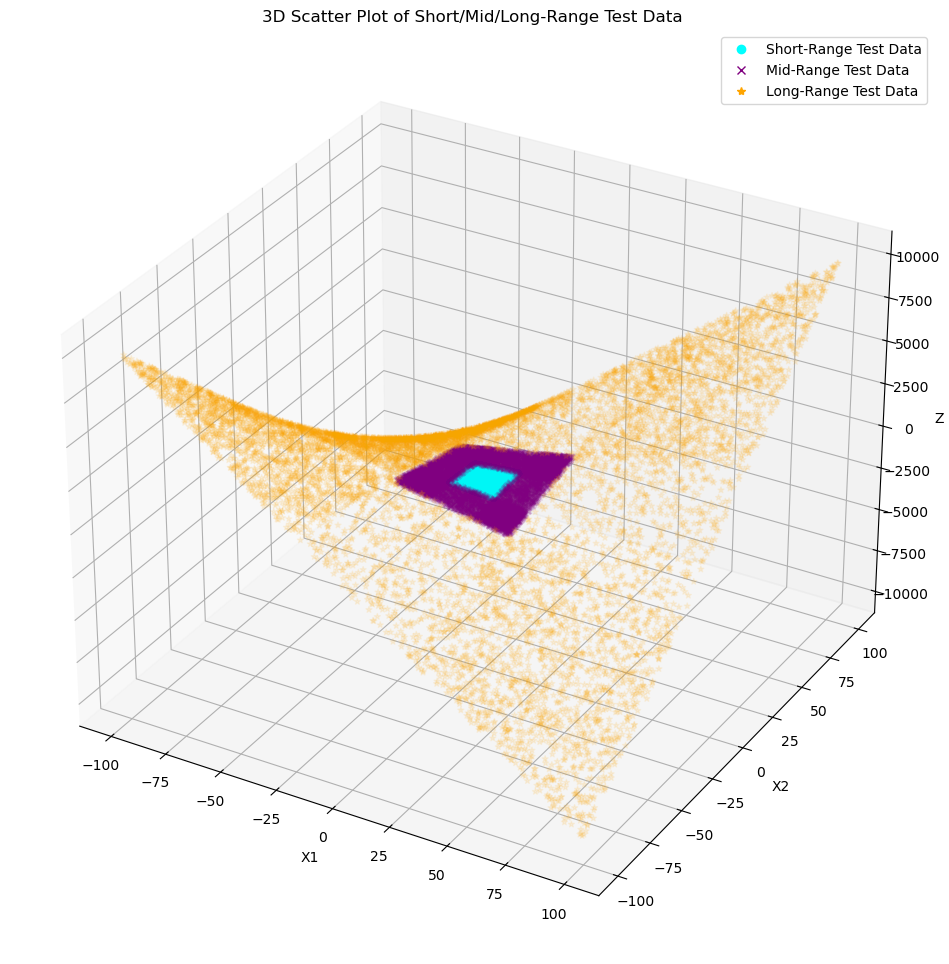

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data points with low alpha
# scatter_train = ax.scatter(X_train_2_input[:, 0], X_train_2_input[:, 1], y_train_2_input, c='blue', marker='o', alpha=0.1)
# scatter_test = ax.scatter(X_test_2_input[:, 0], X_test_2_input[:, 1], y_test_2_input, c='red', marker='^', alpha=0.1)
# scatter_val = ax.scatter(X_val_2_input[:, 0], X_val_2_input[:, 1], y_val_2_input, c='green', marker='s', alpha=0.1)
scatter_short = ax.scatter(X_test_short_range_2_input[:, 0], X_test_short_range_2_input[:, 1], Y_test_short_range_2_input, c='cyan', marker='o', alpha=0.1)
scatter_mid = ax.scatter(X_test_mid_range_2_input[:, 0], X_test_mid_range_2_input[:, 1], Y_test_mid_range_2_input, c='purple', marker='x', alpha=0.1)
scatter_long = ax.scatter(X_test_long_range_2_input[:, 0], X_test_long_range_2_input[:, 1], Y_test_long_range_2_input, c='orange', marker='*', alpha=0.1)

# Create dummy plot elements with solid color for the legend
handles = []
labels = []

# Get colors from the scatter plots (or define them explicitly)
# color_train = scatter_train.get_facecolor()[0] # Or use 'blue'
# color_test = scatter_test.get_facecolor()[0]   # Or use 'red'
# color_val = scatter_val.get_facecolor()[0]     # Or use 'green'
color_short = scatter_short.get_facecolor()[0]     # Or use 'cyan'
color_mid = scatter_mid.get_facecolor()[0]     # Or use 'purple'
color_long = scatter_long.get_facecolor()[0]   # Or use 'orange'

# Create dummy handles with alpha=1.0 and appropriate markers
# dummy_train, = ax.plot([], [], 'o', color=color_train, alpha=1.0, label='Training Data')
# dummy_test, = ax.plot([], [], '^', color=color_test, alpha=1.0, label='Test Data')
# dummy_val, = ax.plot([], [], 's', color=color_val, alpha=1.0, label='Validation Data')
dummy_short, = ax.plot([], [], 'o', color=color_short, alpha=1.0, label='Short-Range Test Data')
dummy_mid, = ax.plot([], [], 'x', color=color_mid, alpha=1.0, label='Mid-Range Test Data')
dummy_long, = ax.plot([], [], '*', color=color_long, alpha=1.0, label='Long-Range Test Data')

# Add dummy handles and labels to the lists
# handles.extend([dummy_train, dummy_test, dummy_val, dummy_short, dummy_mid, dummy_long])
# labels.extend(['Training Data', 'Test Data', 'Validation Data', 'Short-Range Test Data', 'Mid-Range Test Data', 'Long-Range Test Data'])
handles.extend([dummy_short, dummy_mid, dummy_long])
labels.extend(['Short-Range Test Data', 'Mid-Range Test Data', 'Long-Range Test Data'])

# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z')

# Set a title for the plot
# ax.set_title('3D Scatter Plot of Training, Test, Validation, and Mid/Long-Range Test Data')
ax.set_title('3D Scatter Plot of Short/Mid/Long-Range Test Data')

# Add a legend using the dummy handles
ax.legend(handles=handles, labels=labels)

# Show the plot
plt.show()

### Test a single network

Model: "mlp_model with_3_hidden_layers of sizes [10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 64334.1055 - val_loss: 48206.3633
Epoch 2/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 39002.2305 - val_loss: 32718.8145
Epoch 3/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 27667.4160 - val_loss: 15849.8486
Epoch 4/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 11233.4424 - val_loss: 3482.3076
Epoch 5/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2648.1279 - val_loss: 2213.7197
Epoch 6/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2080.6836 - val_loss: 2014.0128
Epoch 7/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2018.2588 - val_loss: 1971.1945
Epoch 8/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1914.3822 - val_loss: 1945.4200
Epoch 9/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1856.4027 - val_loss: 1928.3683
Epoch 10/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1865.2239 - val_loss: 1907.3271
Epoch 11/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 

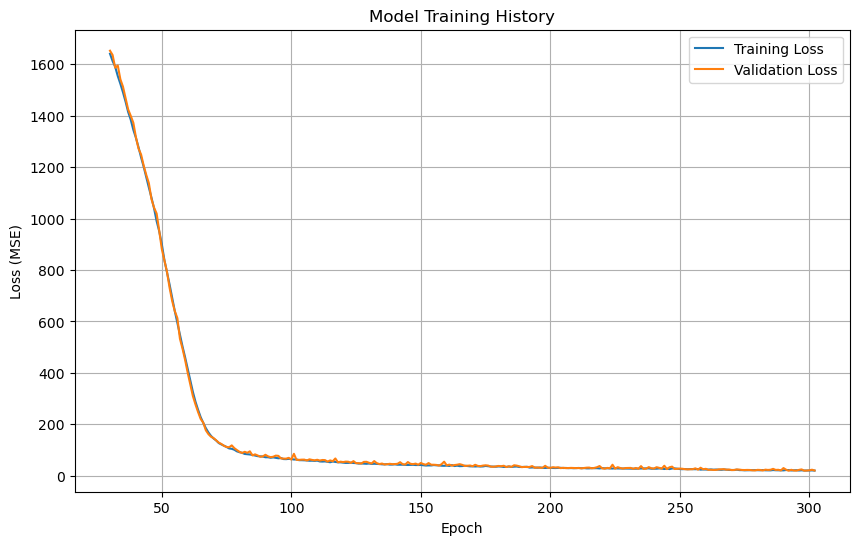

In [16]:

small_model_hidden_layers = [10,10,10]  # Example: two hidden layers with 10 neurons each
# Test the MLP model with the specified hidden layers
small_model, history, losses = test_mlp_model(small_model_hidden_layers,
                                              X_train_2_input, y_train_2_input,
                                              X_val_2_input, y_val_2_input,
                                              X_test_2_input, y_test_2_input,
                                              X_test_short_range_2_input, Y_test_short_range_2_input,
                                              X_test_mid_range_2_input, Y_test_mid_range_2_input,
                                              X_test_long_range_2_input, Y_test_long_range_2_input,
                                              epochs=500, batch_size=32, verbose=1, 
                                              l2_reg=0.0, plot_history=True)

# # Create the model using the function defined previously
# small_model2 = create_mlp_model(small_model_hidden_layers, input_size=2)

# # Define the EarlyStopping callback
# # Monitor validation loss and stop if it doesn't improve for 'patience' epochs
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# # Train the model
# # Use validation data to monitor performance during training
# history = small_model2.fit(
#     X_train_2_input,
#     y_train_2_input,
#     epochs=100, # You can adjust the number of epochs
#     batch_size=32, # You can adjust the batch size
#     validation_data=(X_val_2_input, y_val_2_input),
#     callbacks=[early_stopping], # Add the EarlyStopping callback here
#     verbose=1 # Set to 1 or 2 for more detailed output during training
# )

### Test over a wide range of networks depths and sizes

Testing 1 layers with 10 neurons per layer...


Model: "mlp_model with_1_hidden_layers of sizes [10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 65635.2109 - val_loss: 62685.6719
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 59654.7188 - val_loss: 57145.9805
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 55546.7930 - val_loss: 49832.6094
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 47830.7461 - val_loss: 41036.7305
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 37892.9258 - val_loss: 31575.5078
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 29202.3164 - val_loss: 22722.9004
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 20617.7031 - val_loss: 15315.8662
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13711.2734 - val_loss: 9731.5586
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8859.5225 - val_loss: 5988.6704
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5414.4956 - val_loss: 3767.3416
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 

Model: "mlp_model with_1_hidden_layers of sizes [25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 65813.1875 - val_loss: 61079.8828
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 58491.5664 - val_loss: 50090.0195
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 45864.7812 - val_loss: 35283.5547
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 31881.5547 - val_loss: 20921.9082
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 17741.9512 - val_loss: 10548.5654
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8833.9297 - val_loss: 4930.4219
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4271.6475 - val_loss: 2657.0566
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2425.6277 - val_loss: 1992.2566
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1974.1107 - val_loss: 1854.5367
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1862.0847 - val_loss: 1833.2904
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - los

Model: "mlp_model with_1_hidden_layers of sizes [50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201 (804.00 B)

 Trainable params: 201 (804.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 64760.8789 - val_loss: 58445.8008
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 54597.9805 - val_loss: 40658.7188
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 36027.5273 - val_loss: 20558.0586
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 17493.8652 - val_loss: 7795.6025
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6288.1543 - val_loss: 3023.4204
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2652.8108 - val_loss: 1972.9744
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1962.0771 - val_loss: 1840.0653
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1802.7577 - val_loss: 1830.5388
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1854.9293 - val_loss: 1835.1658
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1840.5780 - val_loss: 1829.0770
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 

Model: "mlp_model with_1_hidden_layers of sizes [75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 65168.9414 - val_loss: 54190.0742
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 48204.6055 - val_loss: 29691.3984
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 23701.4238 - val_loss: 9464.5469
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7093.8350 - val_loss: 2690.1082
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2260.0493 - val_loss: 1866.6600
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1819.6125 - val_loss: 1827.2908
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1782.4976 - val_loss: 1828.9395
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1874.8555 - val_loss: 1830.5863
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1788.7316 - val_loss: 1828.6873
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1878.8331 - val_loss: 1824.8824
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 18

Model: "mlp_model with_1_hidden_layers of sizes [100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 62519.1406 - val_loss: 49310.1719
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 41000.1641 - val_loss: 20535.9902
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 15131.5859 - val_loss: 4412.9067
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3345.3398 - val_loss: 1932.8955
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1882.2073 - val_loss: 1828.7261
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1782.6691 - val_loss: 1829.7981
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1863.5201 - val_loss: 1827.4984
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1812.5625 - val_loss: 1831.4938
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1825.8807 - val_loss: 1828.2777
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1816.1671 - val_loss: 1829.6819
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 18

Model: "mlp_model with_2_hidden_layers of sizes [10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 67866.3359 - val_loss: 63154.3320
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 58011.1484 - val_loss: 46980.0977
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 40107.9180 - val_loss: 22284.9219
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 16895.1445 - val_loss: 7059.5635
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5234.1934 - val_loss: 3164.2263
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2743.4248 - val_loss: 2326.2886
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2188.8413 - val_loss: 2092.3618
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2052.4053 - val_loss: 1991.4004
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1870.3593 - val_loss: 1936.6559
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1876.2145 - val_loss: 1910.5620
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 

Model: "mlp_model with_2_hidden_layers of sizes [25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 751 (2.93 KB)

 Trainable params: 751 (2.93 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 62067.8516 - val_loss: 36012.8555
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 23128.0566 - val_loss: 2429.5811
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2129.9355 - val_loss: 1966.9960
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1843.4124 - val_loss: 1921.9895
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1899.2565 - val_loss: 1895.0778
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1894.4048 - val_loss: 1891.3898
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1858.6506 - val_loss: 1879.6492
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1860.5333 - val_loss: 1874.4580
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1895.6888 - val_loss: 1864.2993
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1846.7947 - val_loss: 1870.2471
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1856

Model: "mlp_model with_2_hidden_layers of sizes [50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,751 (10.75 KB)

 Trainable params: 2,751 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 58876.8750 - val_loss: 15498.9316
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6921.6592 - val_loss: 2110.9629
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1953.1332 - val_loss: 1921.4174
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1980.8627 - val_loss: 1918.4607
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1835.6727 - val_loss: 1888.0891
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1822.7057 - val_loss: 1853.8450
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1857.2131 - val_loss: 1887.5724
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1841.1161 - val_loss: 1887.4718
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1912.1077 - val_loss: 1847.5962
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1814.4487 - val_loss: 1872.6614
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1830.

Model: "mlp_model with_2_hidden_layers of sizes [75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,001 (23.44 KB)

 Trainable params: 6,001 (23.44 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 55835.7461 - val_loss: 2742.8513
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2105.6084 - val_loss: 1932.5845
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1930.6324 - val_loss: 1893.1409
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1865.6084 - val_loss: 1894.1360
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1900.9824 - val_loss: 1861.3824
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1921.3734 - val_loss: 1872.6404
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1858.3312 - val_loss: 1852.5958
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1843.4735 - val_loss: 1843.7908
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1812.0956 - val_loss: 1955.8225
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1839.3750 - val_loss: 1852.9495
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1866.0

Model: "mlp_model with_2_hidden_layers of sizes [100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,501 (41.02 KB)

 Trainable params: 10,501 (41.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 48960.4141 - val_loss: 2075.4004
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1950.0195 - val_loss: 1917.0067
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1897.5935 - val_loss: 1908.3696
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1890.3276 - val_loss: 1867.4242
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1910.1750 - val_loss: 1857.2350
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1866.5292 - val_loss: 1850.9762
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1891.9131 - val_loss: 1837.3816
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1800.7791 - val_loss: 1866.5737
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1829.7997 - val_loss: 1851.5481
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1852.5758 - val_loss: 1835.0693
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1826.6

Model: "mlp_model with_3_hidden_layers of sizes [10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 63206.7344 - val_loss: 47538.1484
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 36344.1523 - val_loss: 17942.3340
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 14163.0098 - val_loss: 3605.7104
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2816.6167 - val_loss: 2153.8337
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2101.1982 - val_loss: 2021.8997
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1977.2821 - val_loss: 2102.9395
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2054.1602 - val_loss: 1966.3057
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1865.8408 - val_loss: 1933.6580
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1901.6257 - val_loss: 1911.6302
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1891.2660 - val_loss: 1900.9266
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 19

Model: "mlp_model with_3_hidden_layers of sizes [25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,401 (5.47 KB)

 Trainable params: 1,401 (5.47 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 59656.8750 - val_loss: 9691.0166
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4183.7969 - val_loss: 2074.9226
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1975.6820 - val_loss: 1962.5753
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1867.6073 - val_loss: 1931.8922
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1795.1702 - val_loss: 1908.0693
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1880.8593 - val_loss: 1868.2920
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1825.4613 - val_loss: 1869.4435
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1829.9027 - val_loss: 1853.3993
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1858.9019 - val_loss: 1868.7700
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1848.3630 - val_loss: 1837.4172
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1844.0

Model: "mlp_model with_3_hidden_layers of sizes [50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,301 (20.71 KB)

 Trainable params: 5,301 (20.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 49821.1719 - val_loss: 2027.3306
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1973.7092 - val_loss: 1890.9945
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1852.0758 - val_loss: 1882.8882
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1933.5275 - val_loss: 1858.4261
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1874.6272 - val_loss: 1860.2792
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1883.6682 - val_loss: 1887.6232
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1843.9242 - val_loss: 1881.8719
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1825.0359 - val_loss: 1882.0480
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1905.1969 - val_loss: 1829.0264
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1833.8796 - val_loss: 1778.3671
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1705.5

Model: "mlp_model with_3_hidden_layers of sizes [75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,701 (45.71 KB)

 Trainable params: 11,701 (45.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 43958.6758 - val_loss: 2030.1943
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1952.8977 - val_loss: 1957.8770
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1942.9231 - val_loss: 1899.2008
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1969.4449 - val_loss: 1910.9646
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1891.8179 - val_loss: 1858.8179
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1906.4865 - val_loss: 1850.8302
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1879.5718 - val_loss: 1831.1526
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1790.9231 - val_loss: 1853.4857
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1804.0480 - val_loss: 1745.5471
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1779.1953 - val_loss: 1801.5002
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1681.6

Model: "mlp_model with_3_hidden_layers of sizes [100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,601 (80.47 KB)

 Trainable params: 20,601 (80.47 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 38068.7695 - val_loss: 2115.6326
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1986.0175 - val_loss: 1874.1439
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1917.9626 - val_loss: 1889.6416
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1936.9807 - val_loss: 1985.8856
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1883.4484 - val_loss: 1877.5513
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1855.8649 - val_loss: 1953.7728
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1881.3651 - val_loss: 1746.6107
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1769.0166 - val_loss: 1835.6124
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1763.5402 - val_loss: 1671.6766
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1610.3439 - val_loss: 1542.8007
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1494.9

Model: "mlp_model with_4_hidden_layers of sizes [10, 10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 65229.5547 - val_loss: 51945.6836
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 47155.0508 - val_loss: 34972.6406
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 33234.8555 - val_loss: 19342.0449
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 19079.3809 - val_loss: 17595.1074
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 18631.6680 - val_loss: 17369.1680
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 17872.4707 - val_loss: 17272.0020
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 18546.5859 - val_loss: 17169.9688
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 18316.6621 - val_loss: 17032.7227
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 17724.0645 - val_loss: 16936.3555
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 18497.2109 - val_loss: 16834.3789
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 

Model: "mlp_model with_4_hidden_layers of sizes [25, 25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,051 (8.01 KB)

 Trainable params: 2,051 (8.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 57350.5195 - val_loss: 2226.3135
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2042.2445 - val_loss: 1933.3871
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1943.8086 - val_loss: 2083.2122
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1940.4883 - val_loss: 1852.7760
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1826.9823 - val_loss: 1930.2258
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1925.1475 - val_loss: 1864.6057
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1871.8564 - val_loss: 1815.7737
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1832.3575 - val_loss: 1815.1421
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1755.7942 - val_loss: 1792.8224
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1739.0045 - val_loss: 1903.2462
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - los

Model: "mlp_model with_4_hidden_layers of sizes [50, 50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,851 (30.67 KB)

 Trainable params: 7,851 (30.67 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 42687.5781 - val_loss: 2038.0029
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2034.2236 - val_loss: 1962.1462
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1936.6278 - val_loss: 1972.7627
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1924.8298 - val_loss: 1882.0038
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1878.9579 - val_loss: 1833.8414
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1845.3357 - val_loss: 1811.1121
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1863.9989 - val_loss: 1843.4033
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1869.1454 - val_loss: 1755.7933
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1815.6461 - val_loss: 1709.0530
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1702.2775 - val_loss: 1869.7986
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1712.2

Model: "mlp_model with_4_hidden_layers of sizes [75, 75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,401 (67.97 KB)

 Trainable params: 17,401 (67.97 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 34696.9609 - val_loss: 2261.4563
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2000.4893 - val_loss: 2813.5415
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2068.5537 - val_loss: 2001.8669
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1952.2806 - val_loss: 1943.0277
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1948.0635 - val_loss: 1840.6385
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1847.1969 - val_loss: 1810.1471
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1900.5707 - val_loss: 1725.0641
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1739.0961 - val_loss: 1541.1202
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1550.6696 - val_loss: 1286.3022
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1229.5131 - val_loss: 868.9547
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 752.965

Model: "mlp_model with_4_hidden_layers of sizes [100, 100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,701 (119.93 KB)

 Trainable params: 30,701 (119.93 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 33052.2695 - val_loss: 2137.8772
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2035.4585 - val_loss: 1930.5616
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1966.5698 - val_loss: 2101.3357
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1931.9666 - val_loss: 1826.0168
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1922.6616 - val_loss: 1888.9253
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1837.5554 - val_loss: 1970.7793
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1812.2045 - val_loss: 1730.9819
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1638.0803 - val_loss: 1701.8232
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1530.9254 - val_loss: 1316.4139
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1131.6342 - val_loss: 855.7534
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 695.261

Model: "mlp_model with_5_hidden_layers of sizes [10, 10, 10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 63896.8086 - val_loss: 39015.0781
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 35740.8516 - val_loss: 7027.2969
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4203.3208 - val_loss: 2359.5596
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2208.7266 - val_loss: 2002.7172
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1955.8021 - val_loss: 1923.1401
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1933.6281 - val_loss: 1878.9044
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1836.6343 - val_loss: 1868.1039
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1815.2061 - val_loss: 1862.2371
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1816.4259 - val_loss: 1791.2040
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1767.2485 - val_loss: 1761.7756
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss

Model: "mlp_model with_5_hidden_layers of sizes [25, 25, 25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,701 (10.55 KB)

 Trainable params: 2,701 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 56091.3086 - val_loss: 2339.4260
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2166.0291 - val_loss: 2065.8066
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2052.6172 - val_loss: 1918.5192
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1926.4025 - val_loss: 1931.5371
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1914.5660 - val_loss: 2105.6255
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1895.3600 - val_loss: 1994.5192
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1919.6110 - val_loss: 1832.5282
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1874.3823 - val_loss: 1836.1058
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1797.8851 - val_loss: 1758.2504
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1761.8489 - val_loss: 1765.2235
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 171

Model: "mlp_model with_5_hidden_layers of sizes [50, 50, 50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,401 (40.63 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 39640.8750 - val_loss: 2118.7764
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2016.8610 - val_loss: 1975.6969
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1955.4650 - val_loss: 1909.5442
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1910.7460 - val_loss: 1846.7916
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1979.9004 - val_loss: 1900.6646
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1873.8760 - val_loss: 1899.3193
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1868.1763 - val_loss: 1793.1490
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1855.6573 - val_loss: 1757.5442
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1690.6949 - val_loss: 1651.7448
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1631.5752 - val_loss: 1602.3290
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 151

Model: "mlp_model with_5_hidden_layers of sizes [75, 75, 75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,101 (90.24 KB)

 Trainable params: 23,101 (90.24 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 36252.7734 - val_loss: 1911.6475
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2181.6384 - val_loss: 2682.1582
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2038.8306 - val_loss: 2440.2559
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1948.1316 - val_loss: 1918.6385
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1885.8276 - val_loss: 1862.9194
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1809.2114 - val_loss: 1712.7054
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1729.9109 - val_loss: 1606.7307
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1632.9121 - val_loss: 1420.7467
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1424.6901 - val_loss: 1176.2644
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1031.5343 - val_loss: 643.8595
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss

Model: "mlp_model with_5_hidden_layers of sizes [100, 100, 100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,801 (159.38 KB)

 Trainable params: 40,801 (159.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 29748.7656 - val_loss: 2412.1836
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2217.1558 - val_loss: 1981.8181
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2007.7411 - val_loss: 2097.8345
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1952.4395 - val_loss: 1841.3346
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1877.9702 - val_loss: 1722.3679
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1742.9796 - val_loss: 1970.4413
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1688.0665 - val_loss: 1613.3876
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1356.9440 - val_loss: 970.6158
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 781.2231 - val_loss: 393.4060
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 265.5145 - val_loss: 179.6213
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 

Model: "mlp_model with_6_hidden_layers of sizes [10, 10, 10, 10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591 (2.31 KB)

 Trainable params: 591 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 63005.6992 - val_loss: 24487.5762
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 20407.1914 - val_loss: 6938.4341
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4272.5796 - val_loss: 2207.5564
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2159.2507 - val_loss: 2024.8075
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1987.2925 - val_loss: 1901.7218
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1849.0930 - val_loss: 1818.8563
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1790.6635 - val_loss: 1850.0935
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1831.6487 - val_loss: 1856.8773
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1773.8030 - val_loss: 1730.5236
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1712.6842 - val_loss: 1844.7953
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss

Model: "mlp_model with_6_hidden_layers of sizes [25, 25, 25, 25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,351 (13.09 KB)

 Trainable params: 3,351 (13.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 50793.1250 - val_loss: 2020.4199
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2002.5660 - val_loss: 1894.1951
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1936.4235 - val_loss: 1899.1875
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1875.7139 - val_loss: 2128.8804
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1897.6407 - val_loss: 2021.7180
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1869.5042 - val_loss: 1810.2687
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1818.3645 - val_loss: 1876.9047
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1876.2069 - val_loss: 1880.6899
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1757.4336 - val_loss: 1882.9346
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1717.7035 - val_loss: 1688.2418
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - l

Model: "mlp_model with_6_hidden_layers of sizes [50, 50, 50, 50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,951 (50.59 KB)

 Trainable params: 12,951 (50.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 36373.5352 - val_loss: 2223.0703
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2088.0344 - val_loss: 1884.6283
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2014.3134 - val_loss: 1975.8149
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1969.2587 - val_loss: 1917.1265
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1878.5438 - val_loss: 1917.6705
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1868.1841 - val_loss: 1757.5815
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1736.4913 - val_loss: 1693.2665
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1615.9474 - val_loss: 1459.8738
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1410.4890 - val_loss: 1287.8840
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1145.9353 - val_loss: 751.6366
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 597

Model: "mlp_model with_6_hidden_layers of sizes [75, 75, 75, 75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,801 (112.50 KB)

 Trainable params: 28,801 (112.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 33097.2734 - val_loss: 2131.7080
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2197.0000 - val_loss: 1956.2224
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2077.7581 - val_loss: 2041.8386
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1918.9667 - val_loss: 1987.9149
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1913.6311 - val_loss: 1828.2034
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1810.0736 - val_loss: 1794.6943
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1780.3893 - val_loss: 1549.1564
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1618.0995 - val_loss: 1296.0303
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1274.4543 - val_loss: 917.6503
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 710.2974 - val_loss: 247.4390
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 

Model: "mlp_model with_6_hidden_layers of sizes [100, 100, 100, 100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,901 (198.83 KB)

 Trainable params: 50,901 (198.83 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 29466.8105 - val_loss: 2138.3704
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2260.2734 - val_loss: 2097.3098
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2061.9902 - val_loss: 1964.9657
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1913.1350 - val_loss: 1867.1571
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1879.8159 - val_loss: 1864.8541
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1704.2585 - val_loss: 1586.7920
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1419.3594 - val_loss: 1170.6440
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1066.7766 - val_loss: 612.9738
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 463.2076 - val_loss: 214.0406
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 145.2587 - val_loss: 51.7372
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 7

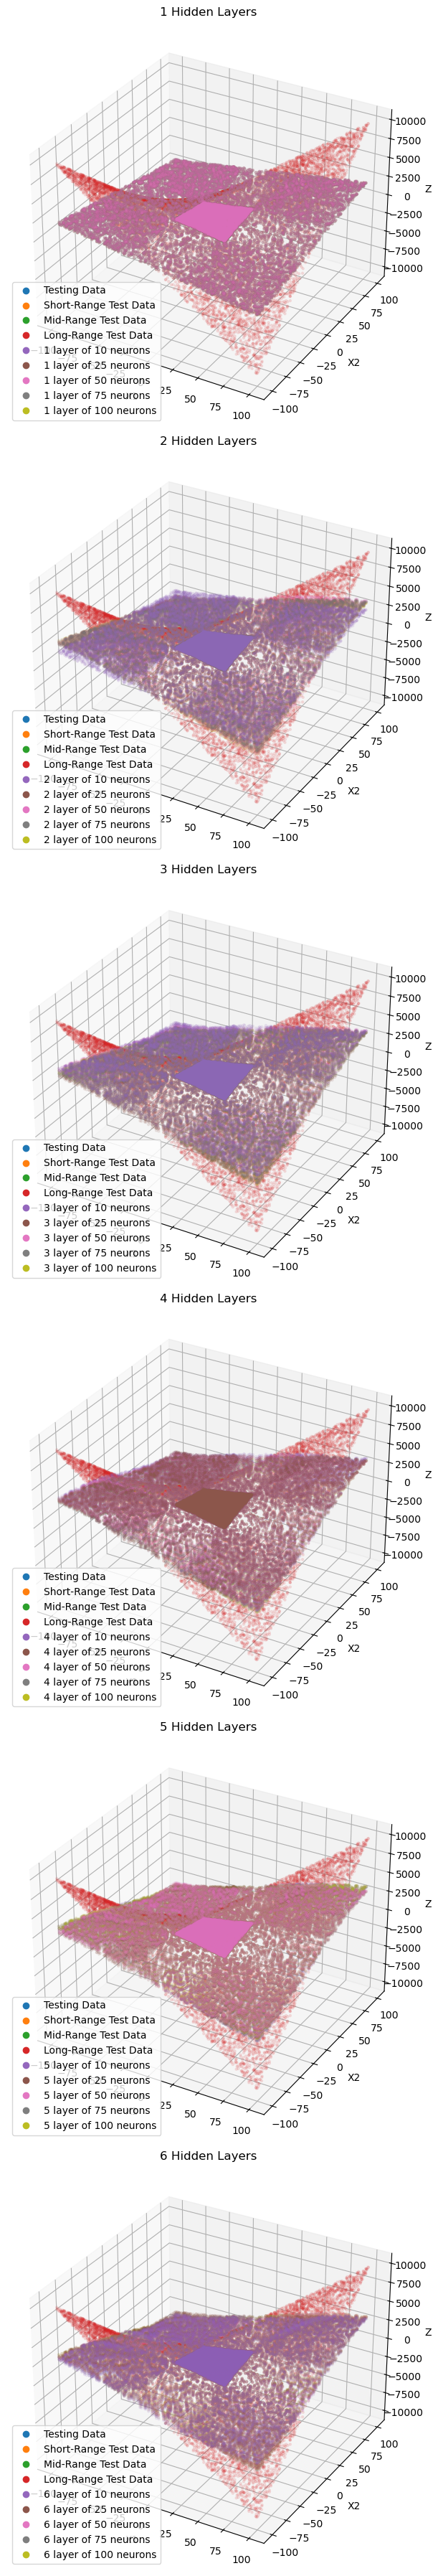


--- Test Results Summary ---
    num_layers  neurons_per_layer  loss_on_range  loss_mid_range  \
0            1                 10    1841.861816     1828.477051   
1            1                 25    1839.546265     1828.006348   
2            1                 50    1845.720947     1829.757446   
3            1                 75    1838.792480     1826.760620   
4            1                100    1842.599854     1826.224854   
5            2                 10     999.842224      984.176514   
6            2                 25      16.520168       16.296844   
7            2                 50       4.116328        3.856016   
8            2                 75       2.569201        2.365925   
9            2                100       1.243001        1.168895   
10           3                 10      86.593475       80.707802   
11           3                 25      21.287991       21.318316   
12           3                 50       2.706005        2.600746   
13           3    

In [17]:
# Define the range of hidden layers and neurons per layer to test
num_layers_list = range(1, 7) # 1 to 6 hidden layers
neurons_list = [10, 25, 50, 75, 100] # Number of neurons in each layer

# List to store results
results_list = []
loss_on_range_2_input = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)
loss_short_range_2_input = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)
loss_mid_range_2_input = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)
loss_long_range_2_input = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)

# Create a figure and a set of subplots
fig = plt.figure(figsize=(12, 6 * len(num_layers_list)))
# ax = fig.add_subplot(111, projection='3d')
# fig, axes = plt.subplots(len(num_layers_list), 1, figsize=(12, 6 * len(num_layers_list)), projection='3d')
total_x_range = np.concatenate((X_test_short_range_2_input, X_test_mid_range_2_input, X_test_long_range_2_input))
# total_y_range = np.concatenate((y_test_2_input, Y_test_mid_range_2_input, Y_test_long_range_2_input)) # This variable is not used in the plot

# Loop through each combination of layers and neurons
for i, num_layers in enumerate(num_layers_list):

    # Get the correct axes object based on the number of subplots
    if len(num_layers_list) == 1:
        ax = fig.add_subplot(111, projection='3d')
    else:
        ax = fig.add_subplot(len(num_layers_list), 1, num_layers, projection='3d')

    # Plot the static data points with low alpha
    handles, labels = ax.get_legend_handles_labels()
    real_data = ax.scatter(X_test_2_input[:, 0], X_test_2_input[:, 1], y_test_2_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Testing Data')
    handles.append(dummy_handle)
    labels.append(f'Testing Data')
    real_data = ax.scatter(X_test_short_range_2_input[:, 0], X_test_short_range_2_input[:, 1], Y_test_short_range_2_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Short-Range Test Data')
    handles.append(dummy_handle)
    labels.append(f'Short-Range Test Data')
    real_data = ax.scatter(X_test_mid_range_2_input[:, 0], X_test_mid_range_2_input[:, 1], Y_test_mid_range_2_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Mid-Range Test Data')
    handles.append(dummy_handle)
    labels.append(f'Mid-Range Test Data')
    real_data = ax.scatter(X_test_long_range_2_input[:, 0], X_test_long_range_2_input[:, 1], Y_test_long_range_2_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Long-Range Test Data')
    handles.append(dummy_handle)
    labels.append(f'Long-Range Test Data')

    # Lists to store handles and labels for the legend
    # Get handles/labels from static data plots first
    handles, labels = ax.get_legend_handles_labels()

    for neurons_per_layer in neurons_list:
        print(f"Testing {num_layers} layers with {neurons_per_layer} neurons per layer...")

        # Define the hidden layer sizes for the current configuration
        hidden_layer_sizes = [neurons_per_layer] * num_layers

        # Create the model using the function defined previously
        # Note: create_mlp_model prints model summary, which will appear for each model
        model, history, losses = test_mlp_model(hidden_layer_sizes,
                                                X_train_2_input, y_train_2_input,
                                                X_val_2_input, y_val_2_input,
                                                X_test_2_input, y_test_2_input,
                                                X_test_short_range_2_input, Y_test_short_range_2_input,
                                                X_test_mid_range_2_input, Y_test_mid_range_2_input,
                                                X_test_long_range_2_input, Y_test_long_range_2_input,
                                                epochs=100, batch_size=32, verbose=1, 
                                                l2_reg=0.0, plot_history=False)
        
        
        loss_on_range_2_input.loc[num_layers, neurons_per_layer] = losses['on range']
        loss_short_range_2_input.loc[num_layers, neurons_per_layer] = losses['short range']
        loss_mid_range_2_input.loc[num_layers, neurons_per_layer] = losses['mid range']
        loss_long_range_2_input.loc[num_layers, neurons_per_layer] = losses['long range']

        # plot the test results with low alpha
        scatter_pred = ax.scatter(total_x_range[:, 0], total_x_range[:, 1], model.predict(total_x_range, verbose=0), alpha=0.1, s=5)

        # Get the color used for this scatter plot
        color = scatter_pred.get_facecolor()[0]

        # Create a dummy plot element with alpha=1.0 for the legend handle
        # Use a line plot with a marker for the legend handle
        dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'{num_layers} layer of {neurons_per_layer} neurons')

        # Add the dummy handle and label to the lists
        handles.append(dummy_handle)
        labels.append(f'{num_layers} layer of {neurons_per_layer} neurons')


        # Store the results in a dictionary
        results_list.append({
            'num_layers': num_layers,
            'neurons_per_layer': neurons_per_layer,
            'loss_on_range': losses['on range'],
            'loss_mid_range': losses['mid range'],
            'loss_long_range': losses['long range']
        })

    # # Set the y-axis to log scale
    # ax.set_yscale('log')

    # Add labels and title
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Z')
    # ax.set_ylabel('Y (log scale)') # Update label to reflect log scale
    ax.set_title(f'{num_layers} Hidden Layers')

    # Add the legend using the collected handles and labels
    ax.legend(handles=handles, labels=labels)

    ax.grid(True)

plt.tight_layout()
plt.show()

# Convert the list of results into a pandas DataFrame
results_df = pd.DataFrame(results_list)

# Display the resulting DataFrame
print("\n--- Test Results Summary ---")
print(results_df)

#### Compare predictions errors on range and out of range

Text(70.72222222222221, 0.5, 'Number of Hidden Layers')

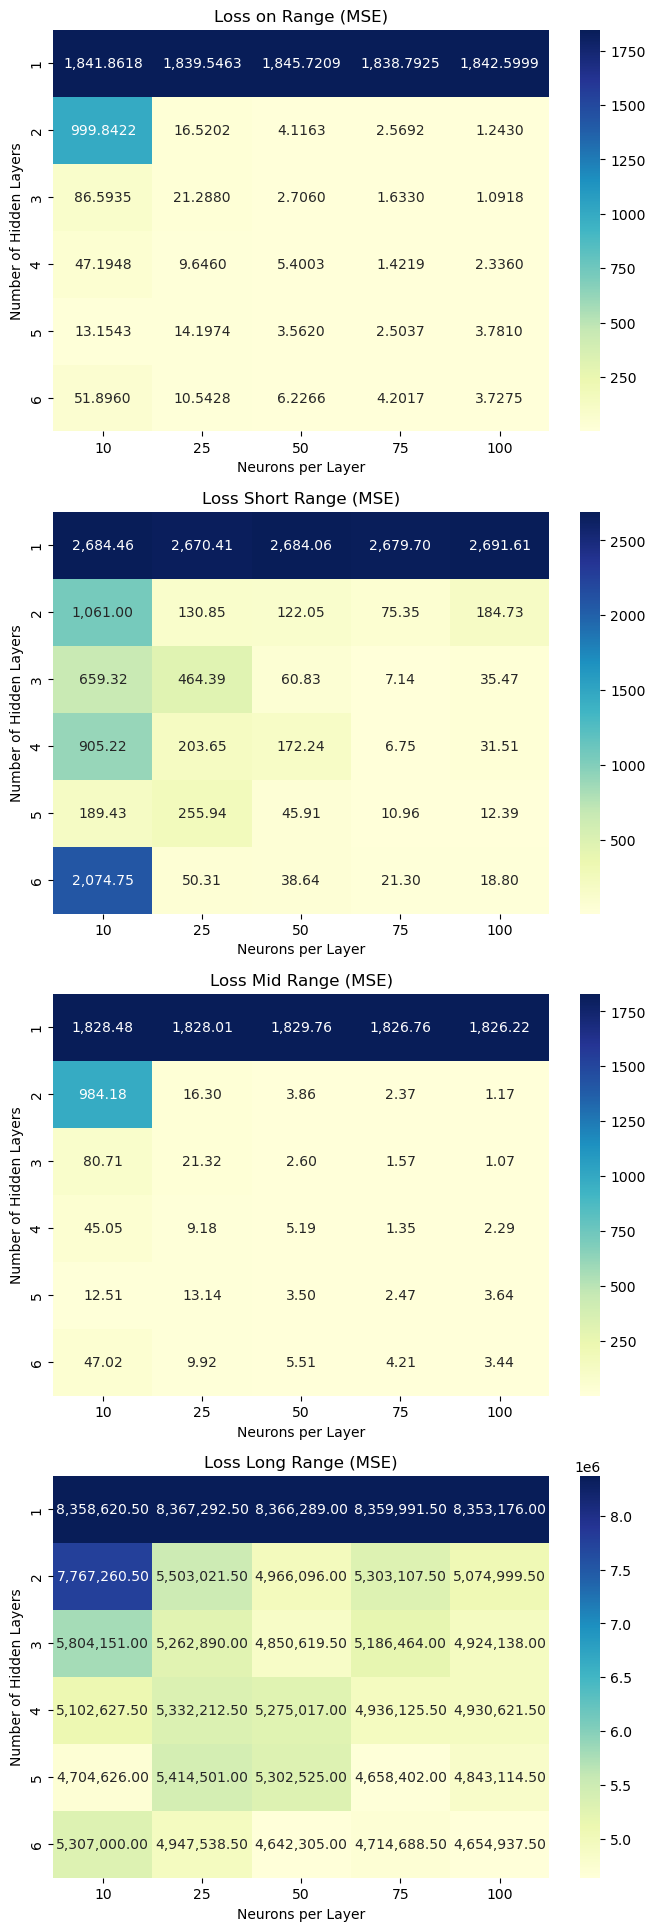

In [18]:
# loss_on_range.info()
# loss_mid_range
# loss_long_range

fig, axes = plt.subplots(4, 1, figsize=(8, 4 * len(num_layers_list)))

sns.heatmap(loss_on_range_2_input, annot=True, fmt=",.4f", cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Loss on Range (MSE)")
axes[0].set_xlabel("Neurons per Layer")
axes[0].set_ylabel("Number of Hidden Layers")
# plt.show()
sns.heatmap(loss_short_range_2_input, annot=True, fmt=",.2f", cmap="YlGnBu", ax=axes[1])
axes[1].set_title("Loss Short Range (MSE)")
axes[1].set_xlabel("Neurons per Layer")
axes[1].set_ylabel("Number of Hidden Layers")
# plt.show()
sns.heatmap(loss_mid_range_2_input, annot=True, fmt=",.2f", cmap="YlGnBu", ax=axes[2])
axes[2].set_title("Loss Mid Range (MSE)")
axes[2].set_xlabel("Neurons per Layer")
axes[2].set_ylabel("Number of Hidden Layers")
# plt.show()
sns.heatmap(loss_long_range_2_input, annot=True, fmt=",.2f", cmap="YlGnBu", ax=axes[3])
axes[3].set_title("Loss Long Range (MSE)")
axes[3].set_xlabel("Neurons per Layer")
axes[3].set_ylabel("Number of Hidden Layers")
# plt.show()


### Two inputs conclusion

The results we got for the two inputs case are similar to the ones we got on the one input case.
We see no strong correlation between network size or depth to its quality, and a little better correlation between layers size and quality.

And the out-of-range results are also similar, showing no generalization, and also displaying linear interpolation/extrapolation of the closest points that doesn't really work for the truly non-linear function we had as a hidden function.

### A solution?

The two inputs case is a little different then the one input one.
While in the one input case there is only one second order polynomial $x^2$, in the two inputs case there are three second order polynomials $x^2$, $y^2$, and $x*y$, so guessing we need second order polynomials means adding them all (otherwise we are cheating).


#### adding second order polynomials

In [19]:
# adding second order polynomials
# x_values_2_input_s = np.column_stack((x_values_1_input, x_values_1_input**2))
# x_values_2_input_s
X_train_2_input_s = np.column_stack((X_train_2_input, X_train_2_input[:,0]**2, X_train_2_input[:,1]**2, X_train_2_input[:,0]*X_train_2_input[:,1]))
X_test_2_input_s = np.column_stack((X_test_2_input, X_test_2_input[:,0]**2, X_test_2_input[:,1]**2, X_test_2_input[:,0]*X_test_2_input[:,1]))
X_val_2_input_s = np.column_stack((X_val_2_input, X_val_2_input[:,0]**2, X_val_2_input[:,1]**2, X_val_2_input[:,0]*X_val_2_input[:,1]))

X_test_short_range_2_input_s = np.column_stack((X_test_short_range_2_input, X_test_short_range_2_input[:,0]**2, X_test_short_range_2_input[:,1]**2, X_test_short_range_2_input[:,0]*X_test_short_range_2_input[:,1]))
X_test_mid_range_2_input_s = np.column_stack((X_test_mid_range_2_input, X_test_mid_range_2_input[:,0]**2, X_test_mid_range_2_input[:,1]**2, X_test_mid_range_2_input[:,0]*X_test_mid_range_2_input[:,1]))
X_test_long_range_2_input_s = np.column_stack((X_test_long_range_2_input, X_test_long_range_2_input[:,0]**2, X_test_long_range_2_input[:,1]**2, X_test_long_range_2_input[:,0]*X_test_long_range_2_input[:,1]))

X_train_2_input_s.shape, X_test_2_input_s.shape, X_val_2_input_s.shape
X_test_mid_range_2_input_s.shape, X_test_long_range_2_input_s.shape

((10000, 5), (10000, 5))

#### Test with the added data

Testing 1 layers with 10 neurons per layer...


Model: "mlp_model with_1_hidden_layers of sizes [10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71 (284.00 B)

 Trainable params: 71 (284.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 77920.9531 - val_loss: 5807.4961
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3429.9414 - val_loss: 670.3334
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 640.3400 - val_loss: 459.8456
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 451.9607 - val_loss: 323.5028
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 326.5986 - val_loss: 235.0749
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 233.7023 - val_loss: 169.6916
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 170.8024 - val_loss: 123.3800
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 124.2843 - val_loss: 88.8982
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 91.3373 - val_loss: 65.7498
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 65.6018 - val_loss: 49.8231
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 51.2934 - val_loss: 40.0316


Model: "mlp_model with_1_hidden_layers of sizes [25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176 (704.00 B)

 Trainable params: 176 (704.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 39801.3398 - val_loss: 646.7209
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 386.2921 - val_loss: 165.1716
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 133.4080 - val_loss: 87.8626
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 72.5666 - val_loss: 50.0606
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 42.4939 - val_loss: 29.3293
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 25.1366 - val_loss: 18.2676
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 16.5351 - val_loss: 12.6295
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 11.5018 - val_loss: 9.2059
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.1369 - val_loss: 7.0341
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.5456 - val_loss: 5.6938
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.3366 - val_loss: 4.4587
Epoch 12/100
188/18

Model: "mlp_model with_1_hidden_layers of sizes [50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 351 (1.37 KB)

 Trainable params: 351 (1.37 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 46723.9844 - val_loss: 278.7142
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 192.0145 - val_loss: 46.2970
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 32.8200 - val_loss: 9.6564
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.7447 - val_loss: 4.8642
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.6191 - val_loss: 3.5779
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.5415 - val_loss: 2.8392
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7707 - val_loss: 2.1408
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1389 - val_loss: 1.7064
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.6212 - val_loss: 1.3557
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2389 - val_loss: 0.9639
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9733 - val_loss: 0.7468
Epoch 12/100
188/188 ━━━━━━━━━━

Model: "mlp_model with_1_hidden_layers of sizes [75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 526 (2.05 KB)

 Trainable params: 526 (2.05 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 26021.7422 - val_loss: 50.4142
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 43.2978 - val_loss: 18.3073
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 16.3872 - val_loss: 7.5490
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.5940 - val_loss: 3.6986
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.6778 - val_loss: 2.4179
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3444 - val_loss: 1.8744
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9518 - val_loss: 1.5610
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5712 - val_loss: 1.2861
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3449 - val_loss: 1.1224
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1612 - val_loss: 0.9676
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9964 - val_loss: 0.7495
Epoch 12/100
188/188 ━━━━━━━━━━━━

Model: "mlp_model with_1_hidden_layers of sizes [100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 701 (2.74 KB)

 Trainable params: 701 (2.74 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 21817.2949 - val_loss: 19.1851
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 12.6918 - val_loss: 5.1995
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.5026 - val_loss: 2.7182
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3424 - val_loss: 1.5568
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3731 - val_loss: 0.9902
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9056 - val_loss: 0.6927
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5861 - val_loss: 0.4921
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4352 - val_loss: 0.3719
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3501 - val_loss: 0.2912
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2723 - val_loss: 0.2297
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2136 - val_loss: 0.1859
Epoch 12/100
188/188 ━━━━━━━━━━━━━━

Model: "mlp_model with_2_hidden_layers of sizes [10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 37472.2461 - val_loss: 1502.1819
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 737.3140 - val_loss: 69.0424
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 55.9141 - val_loss: 31.4046
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 29.8555 - val_loss: 25.3109
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 25.1819 - val_loss: 21.3896
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 20.9405 - val_loss: 18.4414
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 19.5546 - val_loss: 15.9904
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 16.3327 - val_loss: 14.5466
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 14.7663 - val_loss: 13.1559
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 13.6986 - val_loss: 11.7253
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 12.8894 - val_loss: 11.2477
Epoch 12/100


Model: "mlp_model with_2_hidden_layers of sizes [25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 826 (3.23 KB)

 Trainable params: 826 (3.23 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 26163.1230 - val_loss: 57.3903
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 41.1417 - val_loss: 18.3162
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 14.8663 - val_loss: 8.5040
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.5878 - val_loss: 4.8427
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.4784 - val_loss: 3.1490
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.7573 - val_loss: 2.2712
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0147 - val_loss: 1.6912
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5263 - val_loss: 1.3439
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.2204 - val_loss: 1.1649
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0889 - val_loss: 0.9765
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9400 - val_loss: 0.9588
Epoch 12/100
188/188 ━━━━━━━━━━━━

Model: "mlp_model with_2_hidden_layers of sizes [50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,901 (11.33 KB)

 Trainable params: 2,901 (11.33 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 20878.2578 - val_loss: 14.0584
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10.9751 - val_loss: 4.6578
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4.0680 - val_loss: 2.4614
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 2.3370 - val_loss: 1.8065
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.8064 - val_loss: 1.3284
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.3353 - val_loss: 1.2152
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.0081 - val_loss: 0.7496
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.7534 - val_loss: 0.6099
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6088 - val_loss: 0.4793
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4812 - val_loss: 0.3988
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4066 - val_loss: 0.4102
Epoch 12/100
188/188 ━━━━━━━━

Model: "mlp_model with_2_hidden_layers of sizes [75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,226 (24.32 KB)

 Trainable params: 6,226 (24.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 12127.2334 - val_loss: 3.4638
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.5713 - val_loss: 1.6366
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3044 - val_loss: 0.8556
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7490 - val_loss: 0.5583
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5444 - val_loss: 0.4759
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3632 - val_loss: 0.3061
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2685 - val_loss: 0.2206
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2199 - val_loss: 0.1912
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1942 - val_loss: 0.1506
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1510 - val_loss: 0.1175
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1244 - val_loss: 0.1566
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━━

Model: "mlp_model with_2_hidden_layers of sizes [100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,801 (42.19 KB)

 Trainable params: 10,801 (42.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9432.3838 - val_loss: 1.9778
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3823 - val_loss: 0.5780
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5253 - val_loss: 0.3637
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3442 - val_loss: 0.2360
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2220 - val_loss: 0.1620
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1955 - val_loss: 0.1249
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1323 - val_loss: 0.1217
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1029 - val_loss: 0.1199
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1329 - val_loss: 0.1354
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3791 - val_loss: 0.0790
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1101 - val_loss: 0.0747
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━━━

Model: "mlp_model with_3_hidden_layers of sizes [10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 291 (1.14 KB)

 Trainable params: 291 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 36113.3750 - val_loss: 428.2262
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 197.9390 - val_loss: 43.2791
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 33.1491 - val_loss: 16.9719
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 14.6909 - val_loss: 10.4623
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.8227 - val_loss: 7.7024
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.3531 - val_loss: 6.1146
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.7036 - val_loss: 4.8862
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.7678 - val_loss: 4.2102
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.9235 - val_loss: 3.6407
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.5157 - val_loss: 3.2473
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.0872 - val_loss: 2.8596
Epoch 12/100
188/188 ━━━━━━━

Model: "mlp_model with_3_hidden_layers of sizes [25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,476 (5.77 KB)

 Trainable params: 1,476 (5.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 40792.4727 - val_loss: 44.5061
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 28.5902 - val_loss: 12.1569
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 10.0339 - val_loss: 6.0899
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.1458 - val_loss: 3.3850
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.2601 - val_loss: 2.4081
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.1370 - val_loss: 1.5703
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.7319 - val_loss: 1.3391
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.3483 - val_loss: 1.0716
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1359 - val_loss: 0.9397
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0377 - val_loss: 0.9656
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.8846 - val_loss: 0.8335
Epoch 12/100
188/188 ━━━━━━━━━━━━

Model: "mlp_model with_3_hidden_layers of sizes [50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,451 (21.29 KB)

 Trainable params: 5,451 (21.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 15256.5479 - val_loss: 8.1424
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.0065 - val_loss: 2.0117
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.7223 - val_loss: 0.9757
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.9191 - val_loss: 0.7343
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6664 - val_loss: 0.4497
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5391 - val_loss: 0.3806
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4223 - val_loss: 0.3721
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2806 - val_loss: 0.2111
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2788 - val_loss: 0.3061
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2911 - val_loss: 0.1740
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1780 - val_loss: 0.4133
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━━

Model: "mlp_model with_3_hidden_layers of sizes [75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,926 (46.59 KB)

 Trainable params: 11,926 (46.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 15021.1182 - val_loss: 3.4220
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.5563 - val_loss: 1.0981
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.8596 - val_loss: 0.4612
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4101 - val_loss: 0.2565
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2435 - val_loss: 0.1942
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1836 - val_loss: 0.1477
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1351 - val_loss: 0.2944
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1301 - val_loss: 0.0893
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1003 - val_loss: 0.0988
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0734 - val_loss: 0.0970
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0827 - val_loss: 0.0725
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━

Model: "mlp_model with_3_hidden_layers of sizes [100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,901 (81.64 KB)

 Trainable params: 20,901 (81.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 11576.6240 - val_loss: 2.0974
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.4929 - val_loss: 0.7322
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5856 - val_loss: 0.3290
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3315 - val_loss: 0.2560
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2658 - val_loss: 0.1823
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1526 - val_loss: 0.1441
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1293 - val_loss: 0.1574
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1308 - val_loss: 0.0688
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0849 - val_loss: 0.0574
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0665 - val_loss: 0.0656
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1160 - val_loss: 0.0459
Epoch 12/100
188/188 ━━━━━━━━━━━━━

Model: "mlp_model with_4_hidden_layers of sizes [10, 10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 25194.4492 - val_loss: 286.9948
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 195.7461 - val_loss: 58.4104
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 50.4861 - val_loss: 27.0280
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 25.5787 - val_loss: 17.4180
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 17.1400 - val_loss: 11.6255
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 10.8473 - val_loss: 8.9625
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 6.8396 - val_loss: 4.9156
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.8026 - val_loss: 3.7050
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.3652 - val_loss: 2.7667
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.9789 - val_loss: 2.7105
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.5937 - val_loss: 2.0126
Epoch 12/100
188/188 ━━━━

Model: "mlp_model with_4_hidden_layers of sizes [25, 25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,126 (8.30 KB)

 Trainable params: 2,126 (8.30 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 29208.3477 - val_loss: 22.2620
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 13.3972 - val_loss: 3.8289
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3.1635 - val_loss: 2.1121
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.7434 - val_loss: 1.4375
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.0899 - val_loss: 0.8179
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.8522 - val_loss: 0.6976
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7098 - val_loss: 0.5335
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.5309 - val_loss: 0.5798
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.5405 - val_loss: 0.4352
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.5643 - val_loss: 0.5380
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.5041 - val_loss: 0.4139
Epoch 12/100
188/188 ━━━━━━━━━━━

Model: "mlp_model with_4_hidden_layers of sizes [50, 50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 17113.3828 - val_loss: 5.3810
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.2357 - val_loss: 1.5632
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.4932 - val_loss: 0.7532
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7987 - val_loss: 0.5791
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.4701 - val_loss: 0.4135
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3320 - val_loss: 0.2767
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2693 - val_loss: 0.3050
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2289 - val_loss: 0.1443
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2122 - val_loss: 0.3449
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2039 - val_loss: 0.2450
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1796 - val_loss: 0.1487
Epoch 12/100
188/188 ━━━━━━━━━━━━━━━━

Model: "mlp_model with_4_hidden_layers of sizes [75, 75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,626 (68.85 KB)

 Trainable params: 17,626 (68.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 8459.5879 - val_loss: 3.4365
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.5304 - val_loss: 0.9997
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.8009 - val_loss: 0.3833
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.4388 - val_loss: 0.1506
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1905 - val_loss: 0.4091
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1934 - val_loss: 0.1050
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1000 - val_loss: 0.0893
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1067 - val_loss: 0.1973
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1552 - val_loss: 0.0991
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0940 - val_loss: 0.0504
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1904 - val_loss: 6.8057
Epoch 12/100
188/188 ━━━━━━━

Model: "mlp_model with_4_hidden_layers of sizes [100, 100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,001 (121.10 KB)

 Trainable params: 31,001 (121.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9624.1982 - val_loss: 0.7881
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.7170 - val_loss: 0.6162
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7583 - val_loss: 0.4025
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2039 - val_loss: 0.2357
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1591 - val_loss: 0.2152
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2775 - val_loss: 0.0653
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2389 - val_loss: 0.2218
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.2167 - val_loss: 0.2821
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3175 - val_loss: 0.1917
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 11.8110 - val_loss: 0.7272
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3868 - val_loss: 0.2465
Epoch 12/100
188/188 ━━━━━━━━━━━━━━

Model: "mlp_model with_5_hidden_layers of sizes [10, 10, 10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 511 (2.00 KB)

 Trainable params: 511 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 48429.0508 - val_loss: 3331.3491
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1217.3878 - val_loss: 128.0820
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 101.7938 - val_loss: 38.3742
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 33.3487 - val_loss: 17.1064
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 15.7444 - val_loss: 7.7323
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 7.8846 - val_loss: 5.4616
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 5.5163 - val_loss: 5.4035
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.2045 - val_loss: 3.7874
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.1813 - val_loss: 2.9471
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.7950 - val_loss: 1.9156
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.1298 - val_loss: 1.7021
Epoch 12/100


Model: "mlp_model with_5_hidden_layers of sizes [25, 25, 25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,776 (10.84 KB)

 Trainable params: 2,776 (10.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 25737.4355 - val_loss: 13.9923
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 8.8224 - val_loss: 3.0072
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.8678 - val_loss: 1.8929
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.0242 - val_loss: 1.3981
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.4039 - val_loss: 3.2196
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.0327 - val_loss: 0.9451
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.0217 - val_loss: 1.2612
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.9806 - val_loss: 2.0527
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.5474 - val_loss: 0.9752
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.9460 - val_loss: 1.1440
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.1422 - val_loss: 0.9555
Epoch 12/100
188/188 ━━━━━━

Model: "mlp_model with_5_hidden_layers of sizes [50, 50, 50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,551 (41.21 KB)

 Trainable params: 10,551 (41.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 13955.8477 - val_loss: 6.0460
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3.0530 - val_loss: 0.9922
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.0929 - val_loss: 1.2379
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.7850 - val_loss: 0.3661
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.5353 - val_loss: 0.8187
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 9.6681 - val_loss: 0.2791
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3307 - val_loss: 0.3619
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.4017 - val_loss: 0.1616
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3572 - val_loss: 0.2974
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.1168 - val_loss: 56.6471
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 12.7801 - val_loss: 0.4874
Epoch 12/100
188/188 ━━━━━━━━━━

Model: "mlp_model with_5_hidden_layers of sizes [75, 75, 75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,326 (91.12 KB)

 Trainable params: 23,326 (91.12 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 12033.0508 - val_loss: 1.3463
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.0140 - val_loss: 0.6982
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.5748 - val_loss: 0.2818
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.3623 - val_loss: 0.2131
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2351 - val_loss: 0.9767
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.4812 - val_loss: 0.3128
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2867 - val_loss: 0.3456
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2945 - val_loss: 0.2035
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.4459 - val_loss: 0.4397
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.9375 - val_loss: 3.9322
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 5.4241 - val_loss: 10.0943
Epoch 12/100
188/188 ━━━━━━

Model: "mlp_model with_5_hidden_layers of sizes [100, 100, 100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,101 (160.55 KB)

 Trainable params: 41,101 (160.55 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 9593.7637 - val_loss: 1.0203
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.7250 - val_loss: 1.0114
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.5972 - val_loss: 0.3868
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.7610 - val_loss: 0.1976
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.7292 - val_loss: 97.7616
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 32.6327 - val_loss: 1.1442
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.5299 - val_loss: 0.1804
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1465 - val_loss: 0.8009
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.9277 - val_loss: 1.1649
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.9568 - val_loss: 0.2225
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.0767 - val_loss: 47.0007
Epoch 12/100
188/188 ━━━

Model: "mlp_model with_6_hidden_layers of sizes [10, 10, 10, 10, 10, 10]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 621 (2.43 KB)

 Trainable params: 621 (2.43 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 46858.4180 - val_loss: 155.9247
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 87.3296 - val_loss: 18.4215
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 15.8198 - val_loss: 8.3565
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 7.9586 - val_loss: 4.8381
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4.9551 - val_loss: 3.3294
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.2719 - val_loss: 2.0908
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.9825 - val_loss: 1.4038
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.4476 - val_loss: 0.8988
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.0594 - val_loss: 0.7004
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.7962 - val_loss: 0.5661
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6548 - val_loss: 0.5811
Epoch 12/100
188/188 ━━

Model: "mlp_model with_6_hidden_layers of sizes [25, 25, 25, 25, 25, 25]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 25)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,426 (13.38 KB)

 Trainable params: 3,426 (13.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 29274.7148 - val_loss: 27.9347
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 19.0876 - val_loss: 7.3923
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 6.1826 - val_loss: 3.9696
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.3263 - val_loss: 2.5391
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.0731 - val_loss: 1.6582
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.5537 - val_loss: 1.3564
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.1591 - val_loss: 1.4980
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.0438 - val_loss: 2.0914
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.0901 - val_loss: 0.9404
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.8809 - val_loss: 2.3579
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.1886 - val_loss: 0.4670
Epoch 12/100
188/188 ━━━━━━━

Model: "mlp_model with_6_hidden_layers of sizes [50, 50, 50, 50, 50, 50]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 50)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,101 (51.18 KB)

 Trainable params: 13,101 (51.18 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 23642.0527 - val_loss: 4.3213
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3.9924 - val_loss: 2.3738
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.8320 - val_loss: 0.9859
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.3256 - val_loss: 1.1000
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.7795 - val_loss: 1.1789
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.6006 - val_loss: 4.5876
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.7464 - val_loss: 74.2214
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 36.1798 - val_loss: 2.3658
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.6441 - val_loss: 0.2165
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.1977 - val_loss: 0.4579
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.8914 - val_loss: 1.8116
Epoch 12/100
188/188 ━━━

Model: "mlp_model with_6_hidden_layers of sizes [75, 75, 75, 75, 75, 75]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 75)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 75)             │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,026 (113.38 KB)

 Trainable params: 29,026 (113.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 11548.8750 - val_loss: 1.0133
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1.0388 - val_loss: 1.9589
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.8762 - val_loss: 0.2755
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.0094 - val_loss: 0.4301
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.7682 - val_loss: 9.0781
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 17.7832 - val_loss: 0.2944
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.3587 - val_loss: 0.2636
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2116 - val_loss: 0.3532
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.3830 - val_loss: 0.1433
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1729 - val_loss: 0.2107
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1965 - val_loss: 0.1509
Epoch 12/100
188/188 ━━━━

Model: "mlp_model with_6_hidden_layers of sizes [100, 100, 100, 100, 100, 100]"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 100)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,201 (200.00 KB)

 Trainable params: 51,201 (200.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 11829.7109 - val_loss: 1.4474
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.2120 - val_loss: 0.3769
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.3486 - val_loss: 0.2463
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.3552 - val_loss: 0.2591
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1863 - val_loss: 0.1996
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.9164 - val_loss: 2.9954
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.1139 - val_loss: 9.5412
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 9.2584 - val_loss: 0.3223
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.5361 - val_loss: 0.4469
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3.3572 - val_loss: 7.4367
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 11.4367 - val_loss: 0.7303
Epoch 12/100
188/188 ━━━━

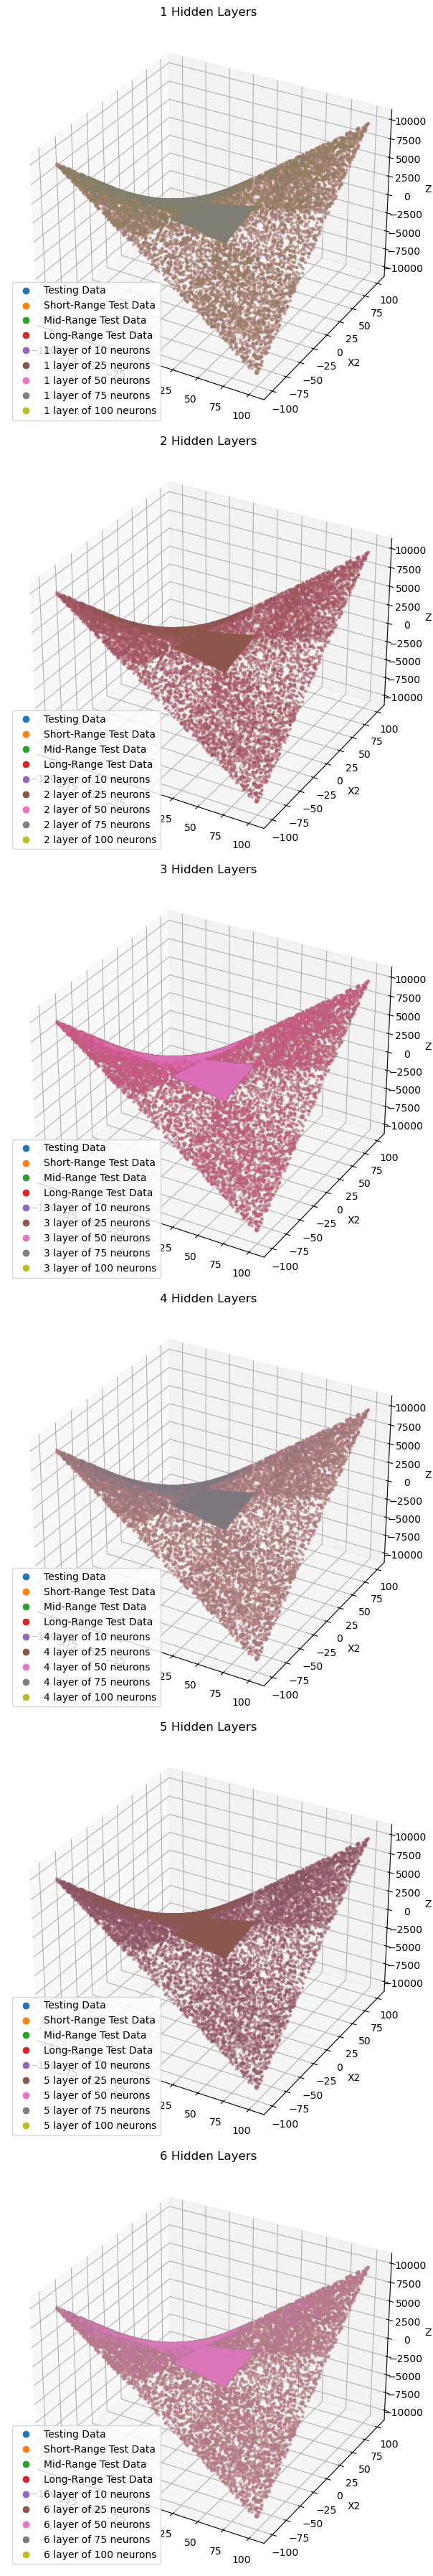


--- Test Results Summary ---
    num_layers  neurons_per_layer  loss_on_range  loss_short_range  \
0            1                 10       0.000003          0.003502   
1            1                 25       0.132161          0.026680   
2            1                 50       0.025575          0.010500   
3            1                 75       0.064842          0.021331   
4            1                100       0.010151          0.007670   
5            2                 10       0.490186          0.020658   
6            2                 25       0.228466          0.111740   
7            2                 50       0.106815          0.028133   
8            2                 75       0.037064          0.022008   
9            2                100       0.055554          0.016265   
10           3                 10       0.252282          0.008407   
11           3                 25       0.192727          0.027266   
12           3                 50       0.077283          0.

In [20]:
# Define the range of hidden layers and neurons per layer to test
num_layers_list = range(1, 7) # 1 to 6 hidden layers
neurons_list = [10, 25, 50, 75, 100] # Number of neurons in each layer

# List to store results
results_list = []
loss_on_range_2_input_s = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)
loss_short_range_2_input_s = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)
loss_mid_range_2_input_s = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)
loss_long_range_2_input_s = pd.DataFrame(index=num_layers_list, columns=neurons_list, dtype=np.float32)

# Create a figure and a set of subplots
fig = plt.figure(figsize=(12, 6 * len(num_layers_list)))
# ax = fig.add_subplot(111, projection='3d')
# fig, axes = plt.subplots(len(num_layers_list), 1, figsize=(12, 6 * len(num_layers_list)), projection='3d')
total_x_range_s = np.concatenate((X_test_short_range_2_input_s, X_test_mid_range_2_input_s, X_test_long_range_2_input_s))
# total_y_range = np.concatenate((y_test_2_input, Y_test_mid_range_2_input, Y_test_long_range_2_input)) # This variable is not used in the plot

# Loop through each combination of layers and neurons
for i, num_layers in enumerate(num_layers_list):

    # Get the correct axes object based on the number of subplots
    if len(num_layers_list) == 1:
        ax = fig.add_subplot(111, projection='3d')
    else:
        ax = fig.add_subplot(len(num_layers_list), 1, num_layers, projection='3d')

    # Plot the static data points with low alpha
    handles, labels = ax.get_legend_handles_labels()
    real_data = ax.scatter(X_test_2_input[:, 0], X_test_2_input[:, 1], y_test_2_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Testing Data')
    handles.append(dummy_handle)
    labels.append(f'Testing Data')
    real_data = ax.scatter(X_test_short_range_2_input[:, 0], X_test_short_range_2_input[:, 1], Y_test_short_range_2_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Short-Range Test Data')
    handles.append(dummy_handle)
    labels.append(f'Short-Range Test Data')
    real_data = ax.scatter(X_test_mid_range_2_input[:, 0], X_test_mid_range_2_input[:, 1], Y_test_mid_range_2_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Mid-Range Test Data')
    handles.append(dummy_handle)
    labels.append(f'Mid-Range Test Data')
    real_data = ax.scatter(X_test_long_range_2_input[:, 0], X_test_long_range_2_input[:, 1], Y_test_long_range_2_input, alpha=0.1, s=5)
    color = real_data.get_facecolor()[0]
    dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'Long-Range Test Data')
    handles.append(dummy_handle)
    labels.append(f'Long-Range Test Data')

    # Lists to store handles and labels for the legend
    # Get handles/labels from static data plots first
    handles, labels = ax.get_legend_handles_labels()

    for neurons_per_layer in neurons_list:
        print(f"Testing {num_layers} layers with {neurons_per_layer} neurons per layer...")

        # Define the hidden layer sizes for the current configuration
        hidden_layer_sizes = [neurons_per_layer] * num_layers

        # Create the model using the function defined previously
        # Note: create_mlp_model prints model summary, which will appear for each model
        model, history, losses = test_mlp_model(hidden_layer_sizes,
                                                X_train_2_input_s, y_train_2_input,
                                                X_val_2_input_s, y_val_2_input,
                                                X_test_2_input_s, y_test_2_input,
                                                X_test_short_range_2_input_s, Y_test_short_range_2_input,
                                                X_test_mid_range_2_input_s, Y_test_mid_range_2_input,
                                                X_test_long_range_2_input_s, Y_test_long_range_2_input,
                                                epochs=100, batch_size=32, verbose=1, 
                                                l2_reg=0.0, plot_history=False)
        
        
        loss_on_range_2_input_s.loc[num_layers, neurons_per_layer] = losses['on range']
        loss_short_range_2_input_s.loc[num_layers, neurons_per_layer] = losses['short range']
        loss_mid_range_2_input_s.loc[num_layers, neurons_per_layer] = losses['mid range']
        loss_long_range_2_input_s.loc[num_layers, neurons_per_layer] = losses['long range']

        # plot the test results with low alpha
        scatter_pred = ax.scatter(total_x_range_s[:, 0], total_x_range_s[:, 1], model.predict(total_x_range_s, verbose=0), alpha=0.1, s=5)

        # Get the color used for this scatter plot
        color = scatter_pred.get_facecolor()[0]

        # Create a dummy plot element with alpha=1.0 for the legend handle
        # Use a line plot with a marker for the legend handle
        dummy_handle, = ax.plot([], [], 'o', color=color, alpha=1.0, label=f'{num_layers} layer of {neurons_per_layer} neurons')

        # Add the dummy handle and label to the lists
        handles.append(dummy_handle)
        labels.append(f'{num_layers} layer of {neurons_per_layer} neurons')


        # Store the results in a dictionary
        results_list.append({
            'num_layers': num_layers,
            'neurons_per_layer': neurons_per_layer,
            'loss_on_range': losses['on range'],
            'loss_short_range': losses['short range'],
            'loss_mid_range': losses['mid range'],
            'loss_long_range': losses['long range']
        })

    # # Set the y-axis to log scale
    # ax.set_yscale('log')

    # Add labels and title
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Z')
    # ax.set_ylabel('Y (log scale)') # Update label to reflect log scale
    ax.set_title(f'{num_layers} Hidden Layers')

    # Add the legend using the collected handles and labels
    ax.legend(handles=handles, labels=labels)

    ax.grid(True)

plt.tight_layout()
plt.show()

# Convert the list of results into a pandas DataFrame
results_df = pd.DataFrame(results_list)

# Display the resulting DataFrame
print("\n--- Test Results Summary ---")
print(results_df)

##### Compare predictions errors on range and out of range

Text(70.72222222222221, 0.5, 'Number of Hidden Layers')

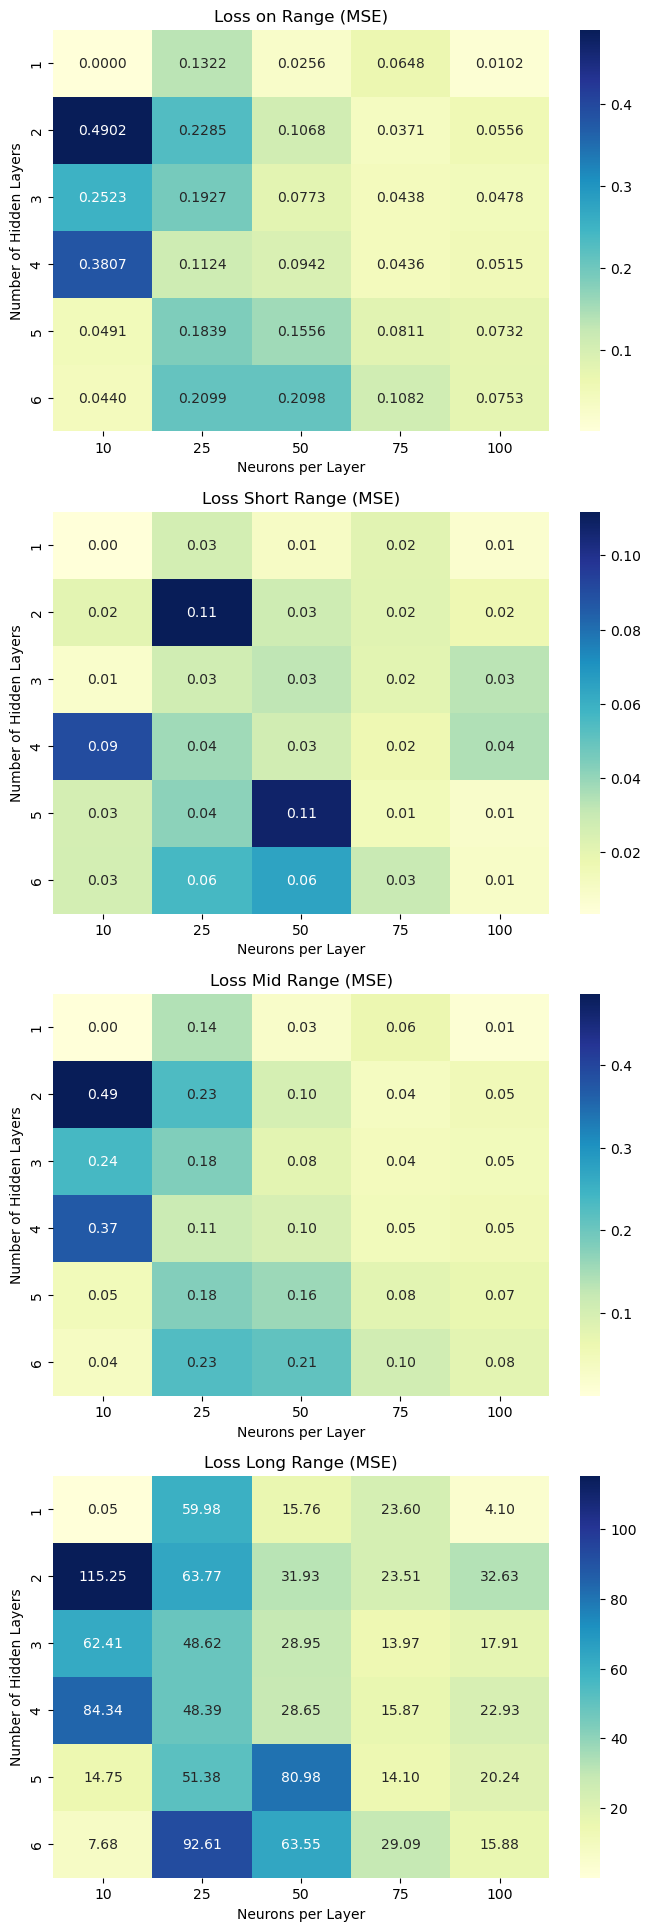

In [21]:
# loss_on_range.info()
# loss_mid_range
# loss_long_range

fig, axes = plt.subplots(4, 1, figsize=(8, 4 * len(num_layers_list)))

sns.heatmap(loss_on_range_2_input_s, annot=True, fmt=",.4f", cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Loss on Range (MSE)")
axes[0].set_xlabel("Neurons per Layer")
axes[0].set_ylabel("Number of Hidden Layers")
# plt.show()
sns.heatmap(loss_short_range_2_input_s, annot=True, fmt=",.2f", cmap="YlGnBu", ax=axes[1])
axes[1].set_title("Loss Short Range (MSE)")
axes[1].set_xlabel("Neurons per Layer")
axes[1].set_ylabel("Number of Hidden Layers")
# plt.show()
sns.heatmap(loss_mid_range_2_input_s, annot=True, fmt=",.2f", cmap="YlGnBu", ax=axes[2])
axes[2].set_title("Loss Mid Range (MSE)")
axes[2].set_xlabel("Neurons per Layer")
axes[2].set_ylabel("Number of Hidden Layers")
# plt.show()
sns.heatmap(loss_long_range_2_input_s, annot=True, fmt=",.2f", cmap="YlGnBu", ax=axes[3])
axes[3].set_title("Loss Long Range (MSE)")
axes[3].set_xlabel("Neurons per Layer")
axes[3].set_ylabel("Number of Hidden Layers")
# plt.show()


## Total conclusions

The results we got from this work are showing that the difference between network sizes and depths is pretty minor, unlike what was said in the past meetup, but similar to what was said, normal neural network can't (or at least have big troubles) generalize truly non-linear functions for out-of-range data.

The solution given does help, but it depends on us having good knowledge of the missing features that will help us to get a better solution that will also generalize.

## An important remark

Here we talked about MLP Neural Networks, 

Attention-based Neural Networks are slightly different in how they work and can technically emulate an N-order polynomial solution, but their solution is on the inputs' embeddings (and not directly on the inputs), so they are not a true general solution to the problem we show here.